In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
import warnings 
import numpy as np
import pymysql

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

import matplotlib.font_manager as fm
# Ìè∞Ìä∏ Í≤ΩÎ°úÏóêÏÑú FontProperties Í∞ùÏ≤¥ ÎßåÎì§Í∏∞
font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
fontprop = fm.FontProperties(fname=font_path)

# Ï†ÑÏó≠ ÏÑ§Ï†ïÏóê Ï†ÅÏö©
plt.rcParams['font.family'] = fontprop.get_name()

# Ïú†Ï†Ä Ï∂úÏÑù ÌååÌä∏

### Ïú†Ï†Ä Î≥Ñ Ï∂úÏÑù ÌöüÏàò, ÏµúÏ¢Ö Ï∂úÏÑùÏùº Îì± ÌôïÏù∏ÌïòÍ∏∞

In [ ]:
user_attendance = pd.read_csv("./data/user_attendance.csv", encoding="utf-8")
user_attendance

user_id attendance_date
0        1446852      2023-05-27
1        1359398      2023-05-27
2        1501542      2023-05-27
3        1507767      2023-05-27
4        1287453      2023-05-27
...          ...             ...
2222322  1499325      2024-05-05
2222323  1499325      2024-05-06
2222324  1499325      2024-05-07
2222325  1499325      2024-05-08
2222326  1499325      2024-05-09

[2222327 rows x 2 columns]

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ Ï∂úÏÑù ÌöüÏàò
user_attendance["user_id"].value_counts()

user_id
1499325    310
1314665    302
1467385    277
1491003    274
1467221    273
          ... 
1534810      1
1523817      1
1366519      1
1462939      1
1583730      1
Name: count, Length: 328692, dtype: int64

In [ ]:
user_attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222327 entries, 0 to 2222326
Data columns (total 2 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          int64 
 1   attendance_date  object
dtypes: int64(1), object(1)
memory usage: 33.9+ MB


In [ ]:
# attendance_date Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
user_attendance['attendance_date'] = pd.to_datetime(user_attendance['attendance_date'])

In [ ]:
user_attendance

user_id attendance_date
0        1446852      2023-05-27
1        1359398      2023-05-27
2        1501542      2023-05-27
3        1507767      2023-05-27
4        1287453      2023-05-27
...          ...             ...
2222322  1499325      2024-05-05
2222323  1499325      2024-05-06
2222324  1499325      2024-05-07
2222325  1499325      2024-05-08
2222326  1499325      2024-05-09

[2222327 rows x 2 columns]

In [ ]:
user_attendance.describe()

user_id                attendance_date
count  2.222327e+06                        2222327
mean   1.258590e+06  2023-06-17 23:42:28.812124672
min    8.321510e+05            2023-05-27 00:00:00
25%    1.087754e+06            2023-05-31 00:00:00
50%    1.279069e+06            2023-06-06 00:00:00
75%    1.442944e+06            2023-06-19 00:00:00
max    1.583730e+06            2024-05-09 00:00:00
std    2.073201e+05                            NaN

In [ ]:
# ÏµúÏ¥à, ÏµúÏ¢Ö Ï∂úÏÑùÏùº Íµ¨ÌïòÍ∏∞ 
user_attendance_summary = user_attendance.groupby('user_id').agg(
    first_date=('attendance_date', 'min'),
    last_date=('attendance_date', 'max')
).reset_index()

user_attendance_summary

user_id first_date  last_date
0        832151 2023-05-29 2023-05-29
1        832340 2023-06-05 2023-06-06
2        832986 2023-05-28 2023-05-28
3        833041 2023-05-27 2024-02-09
4        833112 2023-09-18 2023-09-24
...         ...        ...        ...
328687  1583708 2024-05-06 2024-05-06
328688  1583710 2024-05-05 2024-05-05
328689  1583715 2024-05-05 2024-05-05
328690  1583727 2024-05-09 2024-05-09
328691  1583730 2024-05-09 2024-05-09

[328692 rows x 3 columns]

In [ ]:
## Ïú†Ï†ÄÎ≥Ñ Ï∂úÏÑù Í∞ÑÍ≤© Í≥ÑÏÇ∞ÌïòÍ∏∞ 
# Ïú†Ï†ÄÎ≥ÑÎ°ú Ï∂úÏÑùÏùº ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌïòÍ∏∞
user_attendance_sorted = user_attendance.sort_values(by = ['user_id', 'attendance_date']).copy()
# Ï∂úÏÑùÏùº Í∞ÑÍ≤© Í≥ÑÏÇ∞ÌïòÍ∏∞ - Ïù¥Ï†Ñ Ï∂úÏÑùÏùºÍ≥ºÏùò Ï∞®Ïù¥Î°ú Í≥ÑÏÇ∞ÌïòÍ∏∞
user_attendance_sorted['prev_date'] = user_attendance_sorted.groupby('user_id')['attendance_date'].shift(1)
# Ï∂úÏÑùÏùº Í∞ÑÍ≤© Í≥ÑÏÇ∞ÌïòÍ∏∞ - timedelta ÌòïÏãùÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÍ∏∞
user_attendance_sorted["attendance_interval"] = (user_attendance_sorted["attendance_date"] - user_attendance_sorted["prev_date"]).dt.days

user_attendance_sorted.head(20)

user_id attendance_date  prev_date  attendance_interval
204530    832151      2023-05-29        NaT                  NaN
292875    832340      2023-06-05        NaT                  NaN
563598    832340      2023-06-06 2023-06-05                  1.0
126085    832986      2023-05-28        NaT                  NaN
55892     833041      2023-05-27        NaT                  NaN
380157    833041      2023-05-28 2023-05-27                  1.0
625499    833041      2023-05-29 2023-05-28                  1.0
824544    833041      2023-05-30 2023-05-29                  1.0
991849    833041      2023-05-31 2023-05-30                  1.0
1135154   833041      2023-06-02 2023-05-31                  2.0
1258916   833041      2023-06-03 2023-06-02                  1.0
1366001   833041      2023-06-05 2023-06-03                  2.0
1458858   833041      2023-06-06 2023-06-05                  1.0
1539299   833041      2023-06-18 2023-06-06                 12.0
1608867   833041      2023-06-20 2023-06-18                  2.0
1669143   833041      2023-06-22 2023-06-20                  2.0
1721676   833041      2023-06-27 2023-06-22                  5.0
1767703   833041      2023-06-29 2023-06-27                  2.0
1808084   833041      2023-07-02 2023-06-29                  3.0
1843692   833041      2023-07-04 2023-07-02                  2.0

In [ ]:
## ÏõîÎ≥Ñ Ï∂úÏÑù Í∞ÑÍ≤© Î≥ÄÌôî ÌôïÏù∏ÌïòÍ∏∞ 
# Ïõî Ï†ïÎ≥¥ Ï∂îÏ∂ú 
user_attendance_sorted['month'] = user_attendance_sorted['attendance_date'].dt.to_period('M')
# Ïõî ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤©Í≥ÑÏÇ∞ 
monthly_gap = (user_attendance_sorted[user_attendance_sorted['attendance_interval'].notna()] # ÌèâÍ∑† Í≥ÑÏÇ∞ ÏúÑÌï¥ attendance_intervalÏóêÏÑú NaN Í∞í(Ï≤´ Ï∂úÏÑùÏùºÏóê ÎåÄÌïú ÌñâÏù¥ÎùºÏÑú Î∞úÏÉù) Ï†úÍ±∞ 
                                .groupby('month')['attendance_interval'].mean() 
                                .reset_index(name = 'monthly_gap'))

monthly_gap

month  monthly_gap
0   2023-05     1.179945
1   2023-06     2.229966
2   2023-07     8.126635
3   2023-08    11.046421
4   2023-09    35.609080
5   2023-10    23.569599
6   2023-11    38.828459
7   2023-12    39.630568
8   2024-01    64.857222
9   2024-02    61.877422
10  2024-03    60.443269
11  2024-04    95.275629
12  2024-05   112.666667

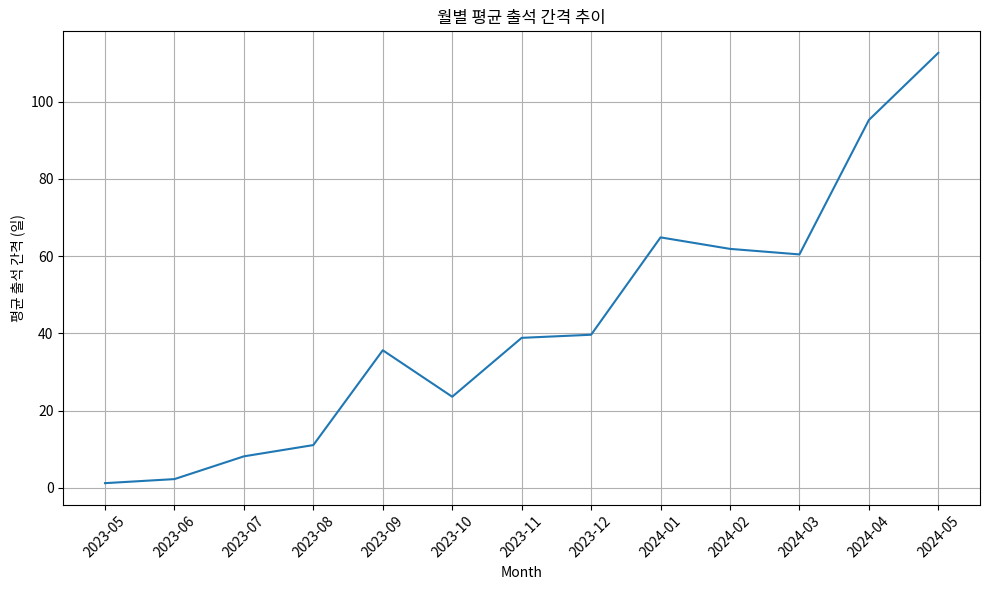

In [ ]:
# ÏõîÎ≥Ñ Ï∂úÏÑù Í∞ÑÍ≤© Ï∂îÏù¥
plt.figure(figsize=(10, 6))
plt.plot(monthly_gap['month'].astype(str), monthly_gap['monthly_gap'])
plt.title('ÏõîÎ≥Ñ ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤© Ï∂îÏù¥')
plt.xlabel('Month')
plt.ylabel('ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤© (Ïùº)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
## Ïú†Ï†∏Î≥Ñ ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤© Í≥ÑÏÇ∞ÌïòÍ∏∞ (Ï≤´ Ï∂úÏÑùÏùºÏóêÎäî Í∞ÑÍ≤©Ïù¥ ÏóÜÏúºÎãà Ï†úÏô∏ÌïòÏó¨ ÌèâÍ∑†)
avg_gap = user_attendance_sorted.groupby("user_id")["attendance_interval"].mean().reset_index()
avg_gap.columns = ["user_id", "avg_attendance_gap_days"]

# ÏµúÏ¥à, ÏµúÏ¢Ö Ï∂úÏÑùÏùºÍ≥º Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤©ÏùÑ ÌÜµÌï©ÌïòÏó¨ ÏöîÏïΩ ÌÖåÏù¥Î∏î ÎßåÎì§Í∏∞
user_attendance_summary = user_attendance_summary.merge(avg_gap, on="user_id", how="left")

# avg_attendance_gap_days Ïª¨ÎüºÏùò Í≤∞Ï∏°Í∞íÏùÑ 0ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ∏∞
user_attendance_summary['avg_attendance_gap_days'] = user_attendance_summary['avg_attendance_gap_days'].fillna(0)

user_attendance_summary.head(20)

user_id first_date  last_date  avg_attendance_gap_days
0    832151 2023-05-29 2023-05-29                 0.000000
1    832340 2023-06-05 2023-06-06                 1.000000
2    832986 2023-05-28 2023-05-28                 0.000000
3    833041 2023-05-27 2024-02-09                 4.961538
4    833112 2023-09-18 2023-09-24                 3.000000
5    833154 2023-05-30 2023-05-30                 0.000000
6    833202 2023-05-31 2023-06-23                23.000000
7    833203 2023-05-27 2023-09-23                17.000000
8    833294 2023-05-28 2023-06-05                 1.333333
9    833303 2023-05-27 2023-09-16                 4.869565
10   833305 2023-07-12 2023-10-15                95.000000
11   833422 2023-05-29 2023-06-10                 4.000000
12   833469 2023-05-28 2023-06-11                 7.000000
13   833626 2023-05-29 2023-09-19                 8.071429
14   833673 2023-06-11 2023-06-11                 0.000000
15   833714 2023-06-27 2023-06-27                 0.000000
16   834008 2023-05-31 2023-07-14                 7.333333
17   834089 2023-05-27 2023-06-29                 1.941176
18   834112 2023-06-23 2023-06-23                 0.000000
19   834162 2023-05-28 2023-09-17                 5.333333

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ Ï∂úÏÑù Ïùº Ïàò ÏßëÍ≥Ñ 
attendance_counts = user_attendance.groupby('user_id').size().reset_index(name='attendance_counts')
# user_attendance_summaryÏóê Ïú†Ï†ÄÎ≥Ñ Ï∂úÏÑù Ïùº Ïàò Ï∂îÍ∞ÄÌïòÍ∏∞ 
user_attendance_summary = user_attendance_summary.merge(attendance_counts, on='user_id', how='left')

user_attendance_summary.head(20)

user_id first_date  last_date  avg_attendance_gap_days  attendance_counts
0    832151 2023-05-29 2023-05-29                 0.000000                  1
1    832340 2023-06-05 2023-06-06                 1.000000                  2
2    832986 2023-05-28 2023-05-28                 0.000000                  1
3    833041 2023-05-27 2024-02-09                 4.961538                 53
4    833112 2023-09-18 2023-09-24                 3.000000                  3
5    833154 2023-05-30 2023-05-30                 0.000000                  1
6    833202 2023-05-31 2023-06-23                23.000000                  2
7    833203 2023-05-27 2023-09-23                17.000000                  8
8    833294 2023-05-28 2023-06-05                 1.333333                  7
9    833303 2023-05-27 2023-09-16                 4.869565                 24
10   833305 2023-07-12 2023-10-15                95.000000                  2
11   833422 2023-05-29 2023-06-10                 4.000000                  4
12   833469 2023-05-28 2023-06-11                 7.000000                  3
13   833626 2023-05-29 2023-09-19                 8.071429                 15
14   833673 2023-06-11 2023-06-11                 0.000000                  1
15   833714 2023-06-27 2023-06-27                 0.000000                  1
16   834008 2023-05-31 2023-07-14                 7.333333                  7
17   834089 2023-05-27 2023-06-29                 1.941176                 18
18   834112 2023-06-23 2023-06-23                 0.000000                  1
19   834162 2023-05-28 2023-09-17                 5.333333                 22

In [ ]:
user_attendance_summary.describe()

user_id                     first_date  \
count  3.286920e+05                         328692   
mean   1.246004e+06  2023-06-03 05:13:37.100507392   
min    8.321510e+05            2023-05-27 00:00:00   
25%    1.065784e+06            2023-05-28 00:00:00   
50%    1.260389e+06            2023-05-29 00:00:00   
75%    1.434592e+06            2023-05-30 00:00:00   
max    1.583730e+06            2024-05-09 00:00:00   
std    2.116482e+05                            NaN   

                           last_date  avg_attendance_gap_days  \
count                         328692            328692.000000   
mean   2023-06-30 04:34:26.605819648                 5.762978   
min              2023-05-27 00:00:00                 0.000000   
25%              2023-06-01 00:00:00                 1.000000   
50%              2023-06-08 00:00:00                 1.714286   
75%              2023-07-08 00:00:00                 4.000000   
max              2024-05-09 00:00:00               345.000000   
std                              NaN                15.659977   

       attendance_counts  
count      328692.000000  
mean            6.761123  
min             1.000000  
25%             2.000000  
50%             4.000000  
75%             9.000000  
max           310.000000  
std             9.299667

- Ï†ÑÏ≤¥ ÏµúÏ¥à Ï∂úÏÑùÏùºÏùÄ 2023-05-27, ÏµúÏ¢Ö Ï∂úÏÑùÏùºÏùÄ 2024-05-09 Î°ú ÏßëÍ≥ÑÎê®. 
    - Îç∞Ïù¥ÌÑ∞ ÏßëÍ≥ÑÍ∞Ä 23ÎÖÑ 5ÏõîÎ∂ÄÌÑ∞ 24ÎÖÑ 5ÏõîÍπåÏßÄÎùºÎ©¥, Ìï¥Îãπ Ï∂úÏÑùÏùº Ï†ÑÌõÑÎ°úÎäî Ï†ÑÌòÄ ÏßëÍ≥ÑÎêòÏßÄ ÏïäÏùÄ Í±¥ÏßÄ ÌôïÏù∏Ïù¥ ÌïÑÏöîÌï† ÎìØ
    - ÏßëÍ≥Ñ Í∏∞Í∞Ñ ÏµúÏÜå 1ÎÖÑ.
- ÌèâÍ∑† Ï∂úÏÑùÏùº Ïàò = 6.7Ïùº, Ï∂úÏÑù Í∞ÑÍ≤© = 5.7Ïùº
- 1ÎÖÑ Í∞Ñ 10Ïùº Ïù¥ÏÉÅ Ï∂úÏÑùÌïòÏßÄ ÏïäÏùÄ Ïù∏ÏõêÏù¥ 75%, ÎÇòÎ®∏ÏßÄ Ïù∏ÏõêÏùÄ ÏµúÎåÄ 310ÏùºÍπåÏßÄ Ï∂úÏÑùÌïòÏßÄÎßå, ÎåÄÎ∂ÄÎ∂Ñ 200Ïùº Ïù¥ÎÇ¥ 
- Ï∂úÏÑù Ïùº ÏàòÏôÄ ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤©Ïù¥ ÎåÄÎ∂ÄÎ∂Ñ 10Ïùº ÎÇ¥Ïóê Î∂ÑÌè¨ÌïòÍ∏¥ ÌïòÏßÄÎßå, ÏµúÎåìÍ∞íÍπåÏßÄ Ïù¥Ïö©Ïûê ÏàòÍ∞Ä ÏóÜÎäî Í≤ÉÏùÄ ÏïÑÎãò. 

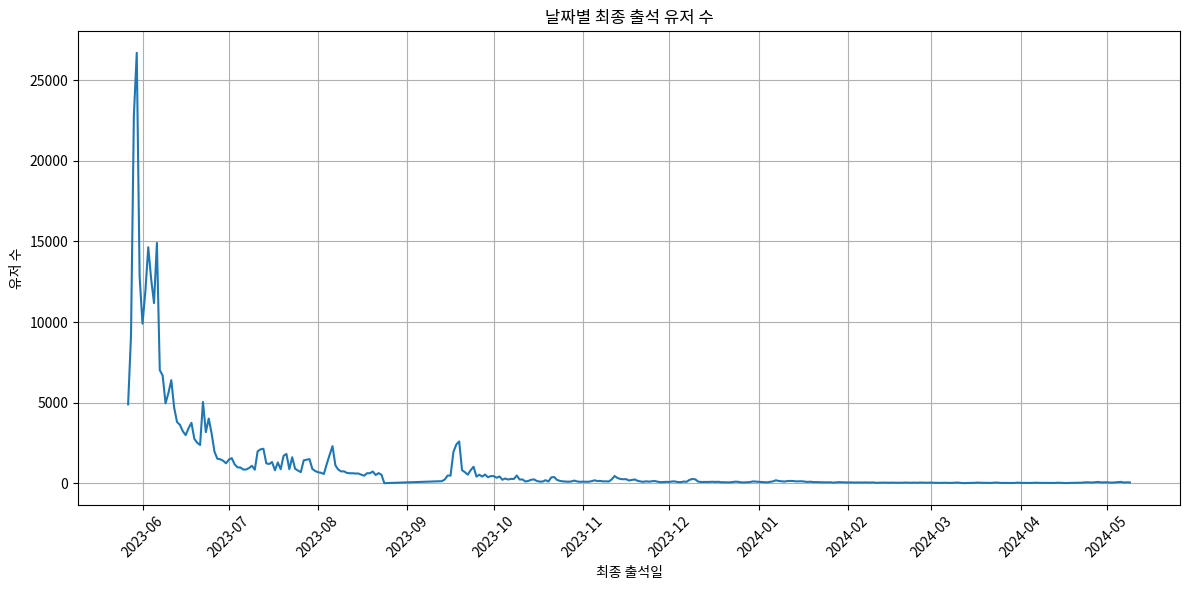

In [ ]:
# ÎÇ†ÏßúÎ≥ÑÎ°ú ÎßàÏßÄÎßâ Ï∂úÏÑùÏùºÏûê Í∏∞Ï§Ä ÏßëÍ≥Ñ
last_day_counts = user_attendance_summary.groupby("last_date").size().reset_index(name="user_count")

# ÎÇ†Ïßú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
last_day_counts = last_day_counts.sort_values("last_date")

# ÎÇ†ÏßúÎ≥Ñ ÏµúÏ¢Ö Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(last_day_counts["last_date"], last_day_counts["user_count"])
plt.title("ÎÇ†ÏßúÎ≥Ñ ÏµúÏ¢Ö Ï∂úÏÑù Ïú†Ï†Ä Ïàò")
plt.xlabel("ÏµúÏ¢Ö Ï∂úÏÑùÏùº")
plt.ylabel("Ïú†Ï†Ä Ïàò")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # xÏ∂ï ÎààÍ∏à Ìïú Îã¨ Í∞ÑÍ≤©ÏúºÎ°ú ÏÑ§Ï†ï
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


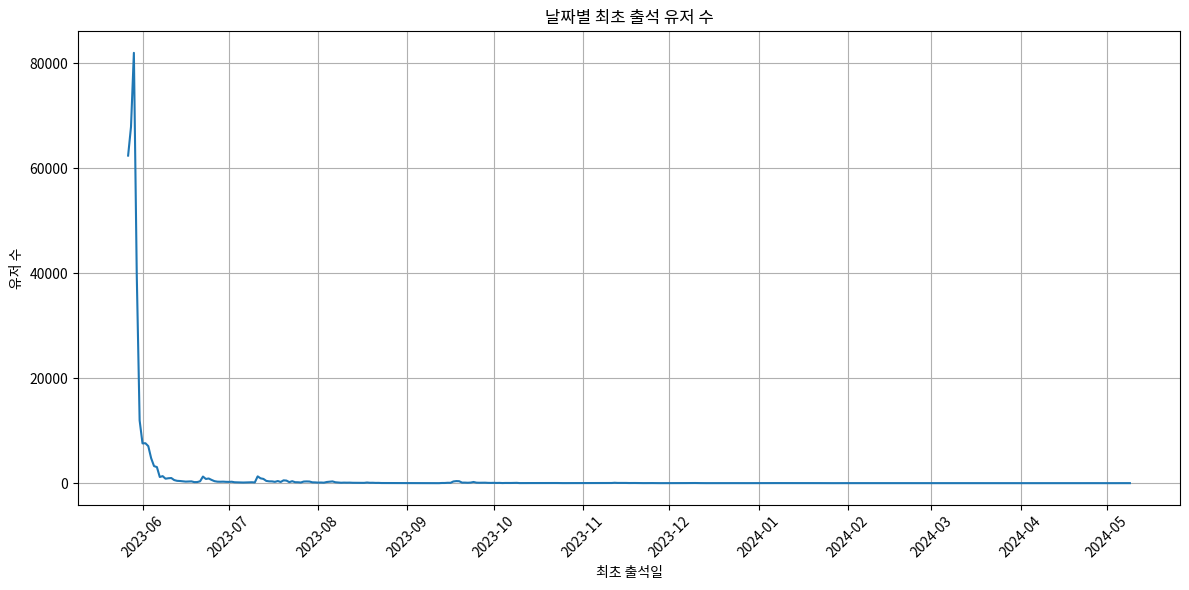

In [ ]:
# ÎÇ†ÏßúÎ≥ÑÎ°ú Ï≤´Î≤àÏß∏ Ï∂úÏÑùÏùºÏûê Í∏∞Ï§Ä ÏßëÍ≥Ñ
first_day_counts = user_attendance_summary.groupby("first_date").size().reset_index(name="user_count")

# ÎÇ†Ïßú Ïò§Î¶ÑÏ∞®Ïàú Ï†ïÎ†¨
first_day_counts = first_day_counts.sort_values("first_date")

# ÎÇ†ÏßúÎ≥Ñ ÏµúÏ¢Ö Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(first_day_counts["first_date"], first_day_counts["user_count"])
plt.title("ÎÇ†ÏßúÎ≥Ñ ÏµúÏ¥à Ï∂úÏÑù Ïú†Ï†Ä Ïàò")
plt.xlabel("ÏµúÏ¥à Ï∂úÏÑùÏùº")
plt.ylabel("Ïú†Ï†Ä Ïàò")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator()) # xÏ∂ï ÎààÍ∏à Ìïú Îã¨ Í∞ÑÍ≤©ÏúºÎ°ú ÏÑ§Ï†ï
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

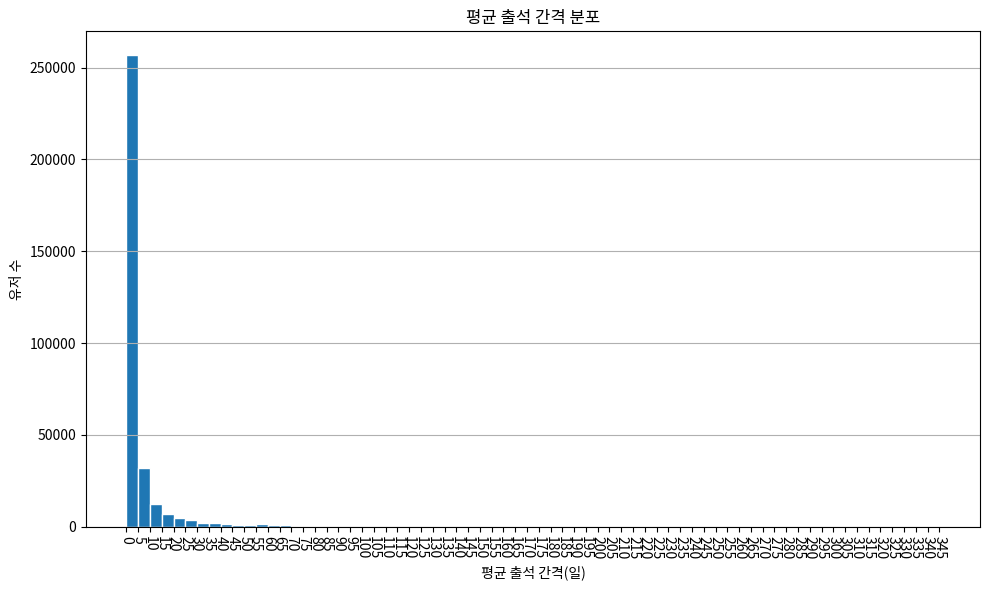

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤© Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî(ÌûàÏä§ÌÜ†Í∑∏Îû®)
# xÏ∂ï Í∞í Î≤îÏúÑ ÌôïÏù∏
min_val = user_attendance_summary['avg_attendance_gap_days'].min()
max_val = user_attendance_summary['avg_attendance_gap_days'].max()

# 5Ïùº Îã®ÏúÑÎ°ú bin Í≤ΩÍ≥Ñ ÏÉùÏÑ±
bins = np.arange(0, max_val + 5, 5)

plt.figure(figsize=(10, 6))
plt.hist(user_attendance_summary['avg_attendance_gap_days'].dropna(), bins=bins, edgecolor='white')
plt.title('ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤© Î∂ÑÌè¨')
plt.xlabel('ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤©(Ïùº)')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.xticks(bins, rotation = -90)  # xÏ∂ï ÎààÍ∏àÎèÑ 5Ïùº Îã®ÏúÑÎ°ú ÏÑ§Ï†ï
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


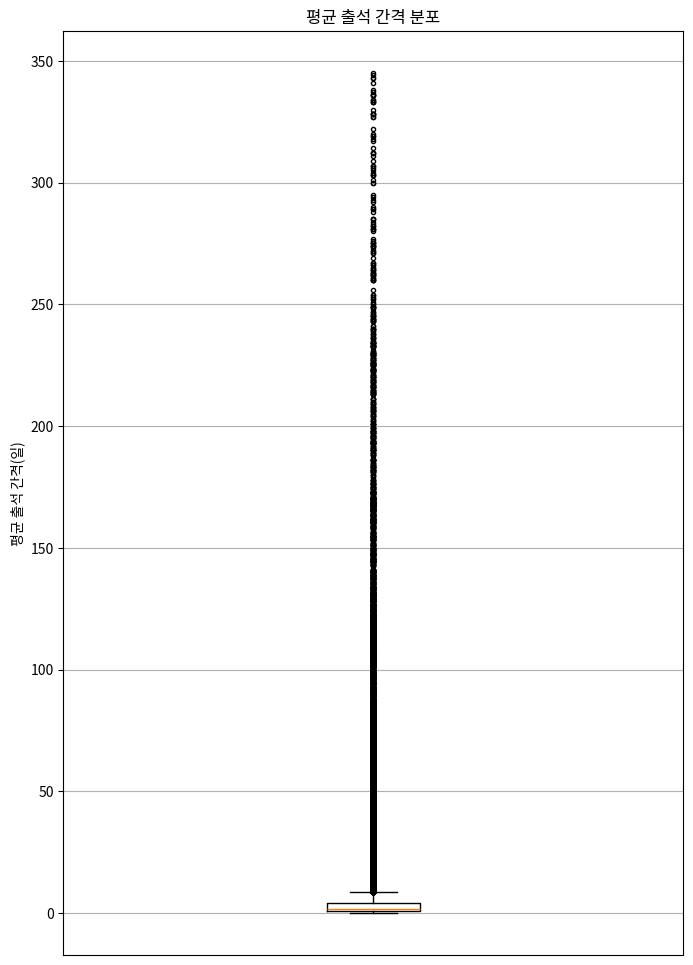

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤© Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,12))

# Î∞ïÏä§ÌîåÎ°ØÏùò Ïù¥ÏÉÅÏπò ÎßàÏª§ ÌÅ¨Í∏∞ ÏÑ§Ï†ï 
flier_props = dict(marker='o', markersize=3, linestyle='none')
plt.boxplot(user_attendance_summary['avg_attendance_gap_days'].dropna(), vert=True, flierprops = flier_props)
plt.title('ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤© Î∂ÑÌè¨')
plt.ylabel('ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤©(Ïùº)')
plt.xticks([])  # xÏ∂ï ÎààÍ∏à Ï†úÍ±∞
plt.grid(True)
plt.show()


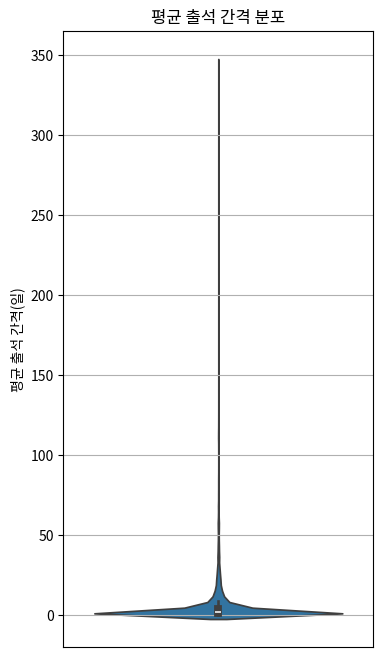

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤© Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî: Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎûè
plt.figure(figsize=(4, 8))
sns.violinplot(
    y=user_attendance_summary['avg_attendance_gap_days'],
    inner='box'  # Î∞ïÏä§ÌîåÎ°Ø Ï∂îÍ∞ÄÍ∞Ä
    #color='skyblue'
)
plt.title('ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤© Î∂ÑÌè¨')
plt.ylabel('ÌèâÍ∑† Ï∂úÏÑù Í∞ÑÍ≤©(Ïùº)')
plt.xticks([])
plt.grid(True, axis='y')
plt.show()


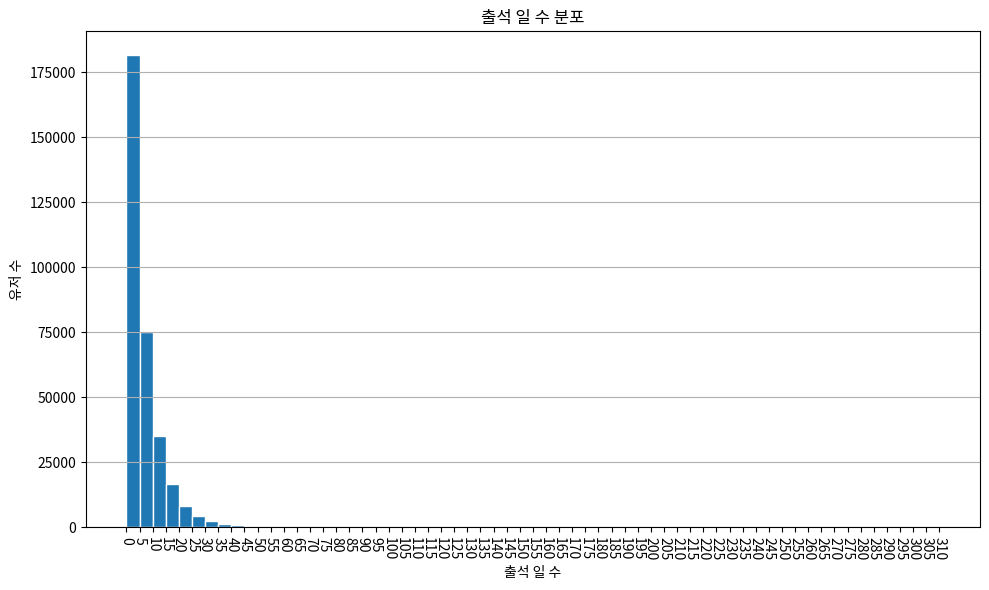

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† Ï∂úÏÑù Ïùº Ïàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî (ÌûàÏä§ÌÜ†Í∑∏Îû®)
# bin Í≤ΩÍ≥Ñ ÏÑ§Ï†ï (Ïòà: 5Ïùº Í∞ÑÍ≤©)
max_days = user_attendance_summary['attendance_counts'].max()
bins = np.arange(0, max_days + 5, 5)

plt.figure(figsize=(10, 6))
plt.hist(user_attendance_summary['attendance_counts'].dropna(), bins=bins, edgecolor='white')
plt.title('Ï∂úÏÑù Ïùº Ïàò Î∂ÑÌè¨')
plt.xlabel('Ï∂úÏÑù Ïùº Ïàò')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.xticks(bins, rotation=-90)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


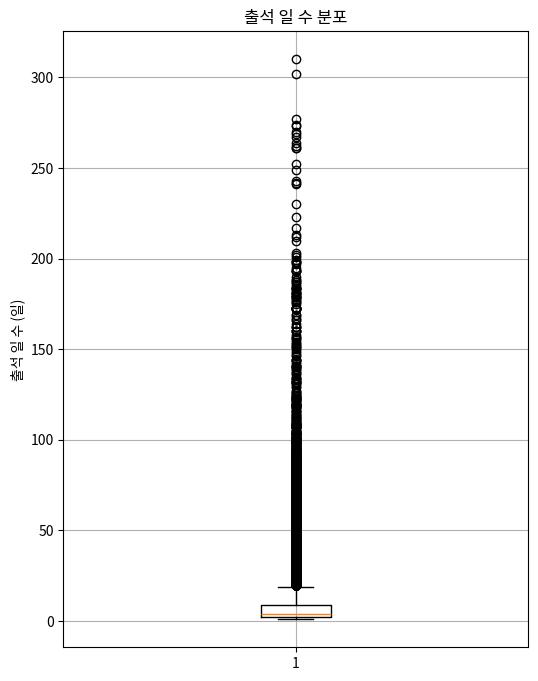

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† Ï∂úÏÑù Ïùº Ïàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî(boxplot)
plt.figure(figsize=(6, 8))
plt.boxplot(user_attendance_summary['attendance_counts'].dropna(), vert=True)
plt.title('Ï∂úÏÑù Ïùº Ïàò Î∂ÑÌè¨')
plt.ylabel('Ï∂úÏÑù Ïùº Ïàò (Ïùº)')
plt.grid(True)
plt.show()


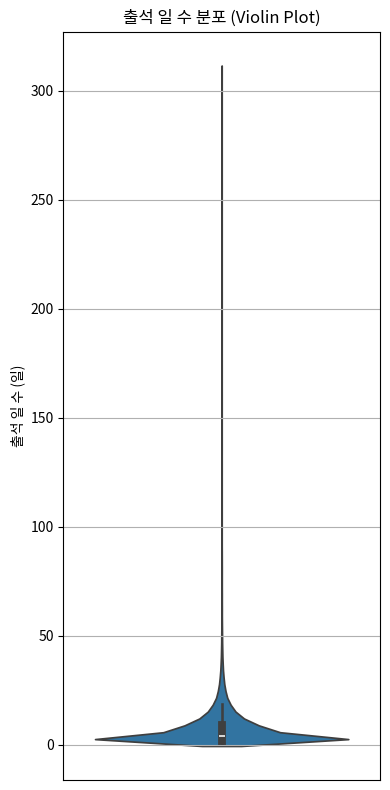

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÌèâÍ∑† Ï∂úÏÑù Ïùº Ïàò Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî: Î∞îÏù¥Ïò¨Î¶∞ Î∂ÑÌè¨
plt.figure(figsize=(4, 8))
sns.violinplot(
    y=user_attendance_summary['attendance_counts'],
    inner='box'
    # color='lightblue'     
)

plt.title('Ï∂úÏÑù Ïùº Ïàò Î∂ÑÌè¨ (Violin Plot)')
plt.ylabel('Ï∂úÏÑù Ïùº Ïàò (Ïùº)')
plt.xticks([])            
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### DAU, MAU, Í≥†Ï∞©ÎèÑ ÌôïÏù∏ÌïòÍ∏∞
- `DAU(Daily Active Users)`: ÌïòÎ£®ÎèôÏïà ÏÑúÎπÑÏä§Ïóê Ï†ëÏÜçÌïú ÏàúÏÇ¨Ïö©Ïûê Ïàò
- `MAU(Monthly Active Users)`: Ìïú Îã¨ ÎèôÏïà Ìïú Î≤àÏù¥ÎùºÎèÑ Ï†ëÏÜçÌïú ÏàúÏÇ¨Ïö©Ïûê Ïàò
- `Í≥†Ï∞©ÎèÑ(Stickiness)` = `DAU/MAU` : Ìïú Îã¨ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏùºÏùº ÏÇ¨Ïö©Ïûê ÎπÑÏú®, Ï¶â ÏñºÎßàÎÇò ÏûêÏ£º Îì§Ïñ¥Ïò§ÎäîÏßÄ Î≥¥Ïó¨Ï£ºÎäî ÏßÄÌëú 

In [ ]:
user_attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222327 entries, 0 to 2222326
Data columns (total 2 columns):
 #   Column           Dtype         
---  ------           -----         
 0   user_id          int64         
 1   attendance_date  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 33.9 MB


In [ ]:
# MAUÎ•º ÏúÑÌï¥ Ïõî Ïª¨Îüº ÏÉùÏÑ±ÌïòÍ∏∞
user_attendance['month'] = user_attendance['attendance_date'].dt.to_period('M')

user_attendance.head(20)

user_id attendance_date    month
0   1446852      2023-05-27  2023-05
1   1359398      2023-05-27  2023-05
2   1501542      2023-05-27  2023-05
3   1507767      2023-05-27  2023-05
4   1287453      2023-05-27  2023-05
5   1394716      2023-05-29  2023-05
6   1232022      2023-05-27  2023-05
7   1497112      2023-05-27  2023-05
8   1449303      2023-05-27  2023-05
9   1406666      2023-05-27  2023-05
10  1142048      2023-05-27  2023-05
11  1489364      2023-05-27  2023-05
12  1218199      2023-05-27  2023-05
13   920993      2023-05-27  2023-05
14  1279952      2023-05-27  2023-05
15  1515683      2023-05-27  2023-05
16  1393903      2023-05-27  2023-05
17  1382553      2023-05-27  2023-05
18  1180976      2023-05-27  2023-05
19  1362054      2023-05-27  2023-05

In [ ]:
# DAU Í≥ÑÏÇ∞ÌïòÍ∏∞ 
dau = user_attendance.groupby('attendance_date')['user_id'] \
                .nunique() \
                .reset_index(name = 'DAU')

dau

attendance_date     DAU
0        2023-05-27   62417
1        2023-05-28   94220
2        2023-05-29  172836
3        2023-05-30  166052
4        2023-05-31  115713
..              ...     ...
328      2024-05-05     107
329      2024-05-06     110
330      2024-05-07      60
331      2024-05-08      68
332      2024-05-09      46

[333 rows x 2 columns]

In [ ]:
# MAU Í≥ÑÏÇ∞ÌïòÍ∏∞
mau = user_attendance.groupby('month')['user_id'] \
                .nunique() \
                .reset_index(name = 'MAU')

mau

month     MAU
0   2023-05  264049
1   2023-06  226928
2   2023-07   61836
3   2023-08   28314
4   2023-09   20482
5   2023-10    9011
6   2023-11    6050
7   2023-12    3612
8   2024-01    3072
9   2024-02    1191
10  2024-03     789
11  2024-04     919
12  2024-05     464

In [ ]:
## Í≥†Ï∞©ÎèÑ Í≥ÑÏÇ∞ÌïòÍ∏∞ 
# DAUÏóê Ïõî Ï†ïÎ≥¥ Ï∂îÍ∞ÄÌïòÍ∏∞(Î®∏ÏßÄÌïòÍ∏∞ ÏúÑÌï¥)
dau['month'] = dau['attendance_date'].dt.to_period('M')
# DAUÏôÄ MAUÎ•º Î®∏ÏßÄÌïòÍ∏∞
dau_mau = dau.merge(mau, on = 'month', how = 'left')
# Í≥†Ï∞©ÎèÑ Í≥ÑÏÇ∞ÌïòÍ∏∞
dau_mau['stickiness'] = dau_mau['DAU'] / dau_mau['MAU'] 

dau_mau

attendance_date     DAU    month     MAU  stickiness
0        2023-05-27   62417  2023-05  264049    0.236384
1        2023-05-28   94220  2023-05  264049    0.356828
2        2023-05-29  172836  2023-05  264049    0.654560
3        2023-05-30  166052  2023-05  264049    0.628868
4        2023-05-31  115713  2023-05  264049    0.438225
..              ...     ...      ...     ...         ...
328      2024-05-05     107  2024-05     464    0.230603
329      2024-05-06     110  2024-05     464    0.237069
330      2024-05-07      60  2024-05     464    0.129310
331      2024-05-08      68  2024-05     464    0.146552
332      2024-05-09      46  2024-05     464    0.099138

[333 rows x 5 columns]

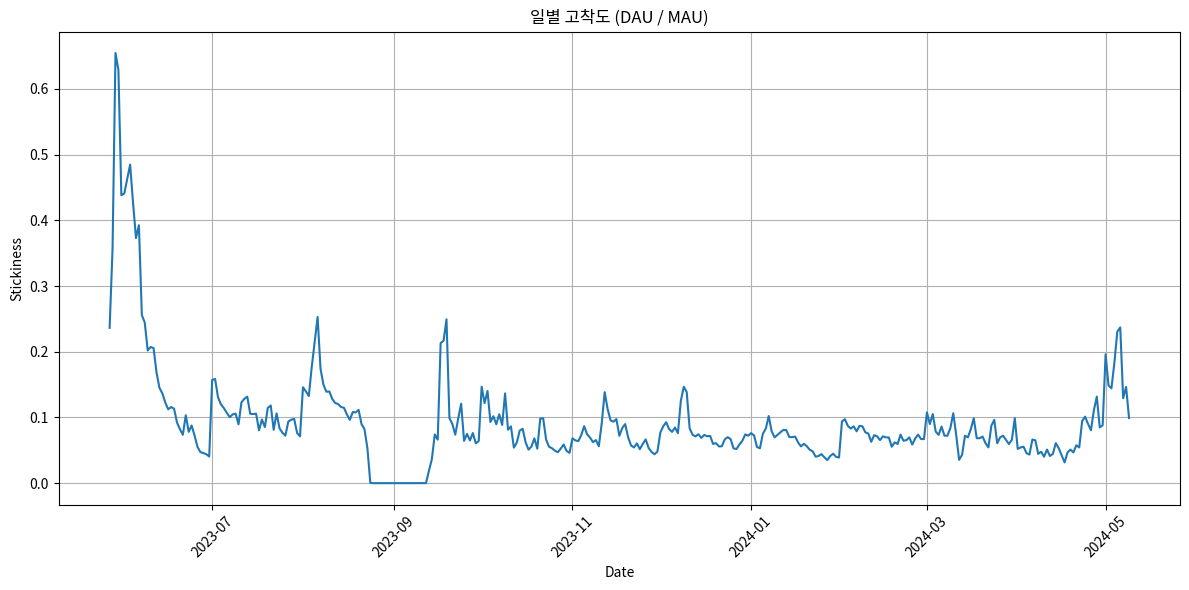

In [ ]:
# Í≥†Ï∞©ÎèÑ ÏãúÍ∞ÅÌôîÌïòÍ∏∞
plt.figure(figsize=(12, 6))
plt.plot(dau_mau['attendance_date'], dau_mau['stickiness'], linestyle='-')
plt.title('ÏùºÎ≥Ñ Í≥†Ï∞©ÎèÑ (DAU / MAU)')
plt.xlabel('Date')
plt.ylabel('Stickiness')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
dau_mau[(dau_mau['attendance_date'].dt.month == 8) & (dau_mau['attendance_date'].dt.year == 2023)]

attendance_date   DAU    month    MAU  stickiness
66      2023-08-01  4133  2023-08  28314    0.145970
67      2023-08-02  3957  2023-08  28314    0.139754
68      2023-08-03  3755  2023-08  28314    0.132620
69      2023-08-04  5008  2023-08  28314    0.176874
70      2023-08-05  6099  2023-08  28314    0.215406
71      2023-08-06  7161  2023-08  28314    0.252914
72      2023-08-07  4924  2023-08  28314    0.173907
73      2023-08-08  4239  2023-08  28314    0.149714
74      2023-08-09  3940  2023-08  28314    0.139154
75      2023-08-10  3952  2023-08  28314    0.139578
76      2023-08-11  3629  2023-08  28314    0.128170
77      2023-08-12  3454  2023-08  28314    0.121989
78      2023-08-13  3412  2023-08  28314    0.120506
79      2023-08-14  3280  2023-08  28314    0.115844
80      2023-08-15  3249  2023-08  28314    0.114749
81      2023-08-16  2959  2023-08  28314    0.104507
82      2023-08-17  2730  2023-08  28314    0.096419
83      2023-08-18  3064  2023-08  28314    0.108215
84      2023-08-19  3050  2023-08  28314    0.107721
85      2023-08-20  3158  2023-08  28314    0.111535
86      2023-08-21  2541  2023-08  28314    0.089744
87      2023-08-22  2330  2023-08  28314    0.082291
88      2023-08-23  1510  2023-08  28314    0.053331
89      2023-08-24    11  2023-08  28314    0.000389
90      2023-08-25     1  2023-08  28314    0.000035
91      2023-08-27     1  2023-08  28314    0.000035

In [ ]:
# 9Ïõî ÏùºÎ∂Ä Í≥†Ï∞©ÎèÑÍ∞Ä Ïôú 0Ïù¥ÏßÄ?
dau_sep_2023 = dau_mau[(dau_mau['attendance_date'].dt.month == 9) & (dau_mau['attendance_date'].dt.year == 2023)]
dau_sep_2023

attendance_date   DAU    month    MAU  stickiness
92       2023-09-12     2  2023-09  20482    0.000098
93       2023-09-13   385  2023-09  20482    0.018797
94       2023-09-14   748  2023-09  20482    0.036520
95       2023-09-15  1518  2023-09  20482    0.074114
96       2023-09-16  1358  2023-09  20482    0.066302
97       2023-09-17  4368  2023-09  20482    0.213260
98       2023-09-18  4441  2023-09  20482    0.216825
99       2023-09-19  5107  2023-09  20482    0.249341
100      2023-09-20  2031  2023-09  20482    0.099160
101      2023-09-21  1841  2023-09  20482    0.089884
102      2023-09-22  1513  2023-09  20482    0.073870
103      2023-09-23  2018  2023-09  20482    0.098526
104      2023-09-24  2476  2023-09  20482    0.120887
105      2023-09-25  1320  2023-09  20482    0.064447
106      2023-09-26  1537  2023-09  20482    0.075041
107      2023-09-27  1332  2023-09  20482    0.065033
108      2023-09-28  1563  2023-09  20482    0.076311
109      2023-09-29  1242  2023-09  20482    0.060639
110      2023-09-30  1313  2023-09  20482    0.064105

In [ ]:
# ÏõîÎ≥Ñ ÌèâÍ∑† Í≥†Ï∞©ÎèÑ 
monthly_stickiness = dau_mau.groupby('month')['stickiness'] \
    .mean() \
    .reset_index(name='avg_stickiness')
monthly_stickiness


month  avg_stickiness
0   2023-05        0.462973
1   2023-06        0.181082
2   2023-07        0.104494
3   2023-08        0.116206
4   2023-09        0.092798
5   2023-10        0.078563
6   2023-11        0.072474
7   2023-12        0.077046
8   2024-01        0.060956
9   2024-02        0.073222
10  2024-03        0.075841
11  2024-04        0.062677
12  2024-05        0.168343

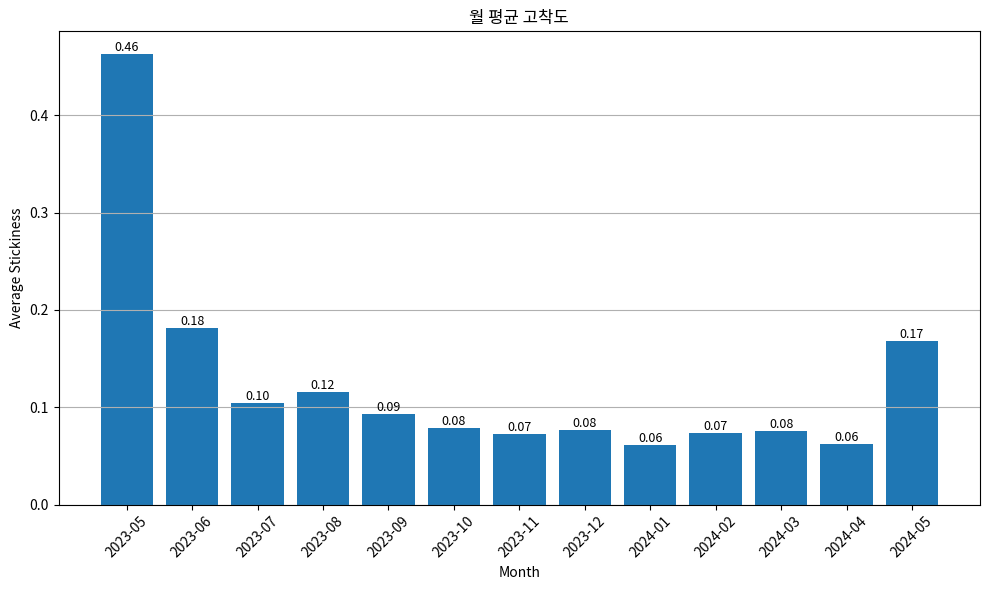

In [ ]:
# ÏõîÎ≥Ñ Í≥†Ï∞©ÎèÑ ÏãúÍ∞ÅÌôî 
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_stickiness['month'].astype(str), monthly_stickiness['avg_stickiness'])
plt.title('Ïõî ÌèâÍ∑† Í≥†Ï∞©ÎèÑ')
plt.xlabel('Month')
plt.ylabel('Average Stickiness')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()

# ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',            
        ha='center', va='bottom',  
        fontsize=9
    )

plt.show()

In [ ]:
## Ï£ºÍ∞Ñ Í≥†Ï∞©ÎèÑ Í≥ÑÏÇ∞ÌïòÍ∏∞ 
# dau_mauÏóê Ï£º Ï†ïÎ≥¥ Ï∂îÍ∞ÄÌïòÍ∏∞
dau_mau['week'] = dau_mau['attendance_date'].dt.to_period('W')

# Ï£ºÍ∞Ñ stickiness Í≥ÑÏÇ∞ÌïòÍ∏∞
weekly_stickiness = dau_mau.groupby('week')['stickiness'] \
    .mean() \
    .reset_index(name='avg_stickiness')

weekly_stickiness.head(10)

week  avg_stickiness
0  2023-05-22/2023-05-28        0.296606
1  2023-05-29/2023-06-04        0.505196
2  2023-06-05/2023-06-11        0.268611
3  2023-06-12/2023-06-18        0.130687
4  2023-06-19/2023-06-25        0.084251
5  2023-06-26/2023-07-02        0.078375
6  2023-07-03/2023-07-09        0.111879
7  2023-07-10/2023-07-16        0.112731
8  2023-07-17/2023-07-23        0.097562
9  2023-07-24/2023-07-30        0.085304

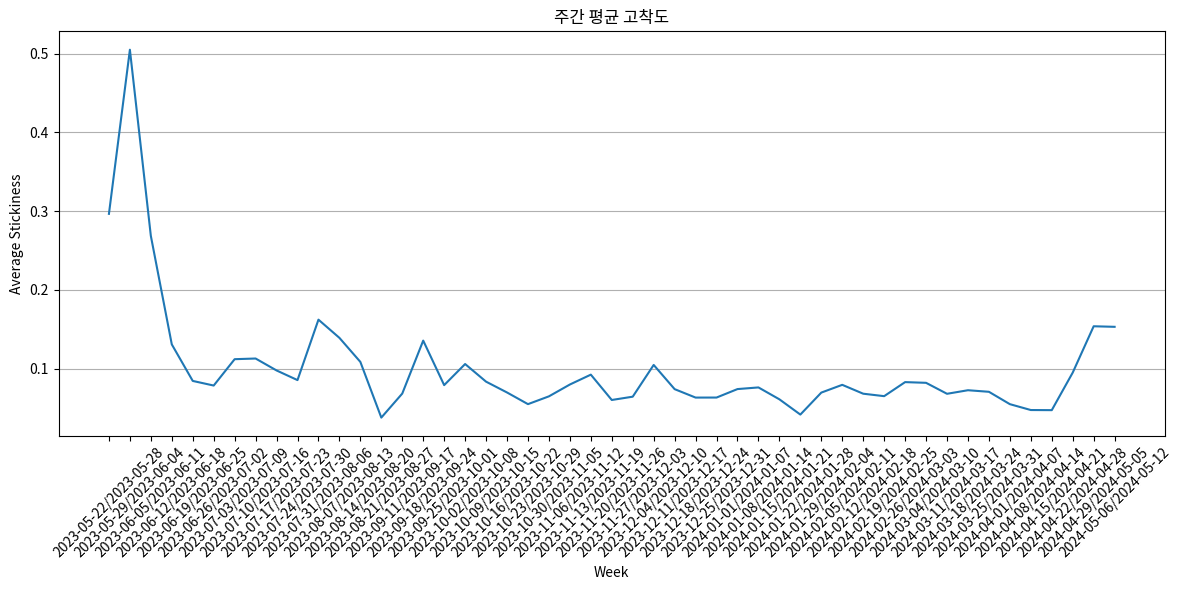

In [ ]:
# Ï£ºÍ∞Ñ Í≥†Ï∞©ÎèÑ ÏãúÍ∞ÅÌôîÌïòÍ∏∞ 
plt.figure(figsize=(12, 6))
plt.plot(weekly_stickiness['week'].astype(str), weekly_stickiness['avg_stickiness'])
plt.title('Ï£ºÍ∞Ñ ÌèâÍ∑† Í≥†Ï∞©ÎèÑ')
plt.xlabel('Week')
plt.ylabel('Average Stickiness')
plt.xticks(rotation=45)
plt.grid(True, axis = 'y')
plt.tight_layout()
plt.show()


In [ ]:
mau

month     MAU
0   2023-05  264049
1   2023-06  226928
2   2023-07   61836
3   2023-08   28314
4   2023-09   20482
5   2023-10    9011
6   2023-11    6050
7   2023-12    3612
8   2024-01    3072
9   2024-02    1191
10  2024-03     789
11  2024-04     919
12  2024-05     464

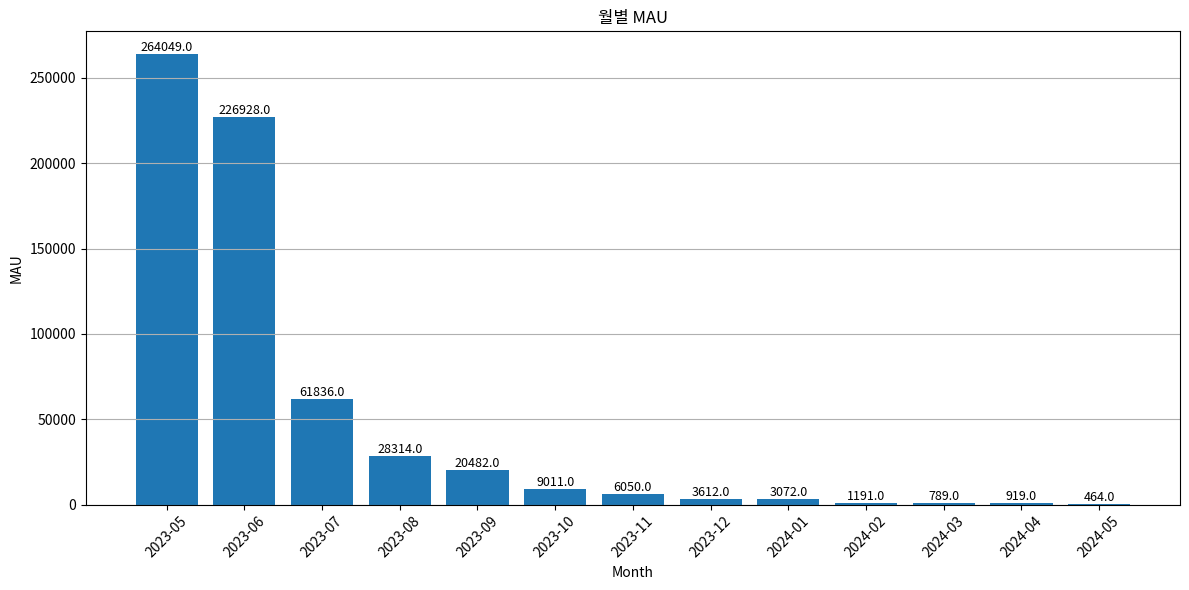

In [ ]:
# Í∏∞Ï°¥ MAU ÏãúÍ∞ÅÌôî : Í≥†Ï∞©ÎèÑ ÌïòÎùΩ ÏõêÏù∏Ïù∏ÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ 
plt.figure(figsize=(12, 6))
bars = plt.bar(mau['month'].astype(str),mau['MAU'])

plt.title('ÏõîÎ≥Ñ MAU')
plt.xlabel('Month')
plt.ylabel('MAU')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()

# ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú 
for bar in bars: 
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.1f}',            
            ha='center', va='bottom',  
            fontsize=9
        )

plt.show()

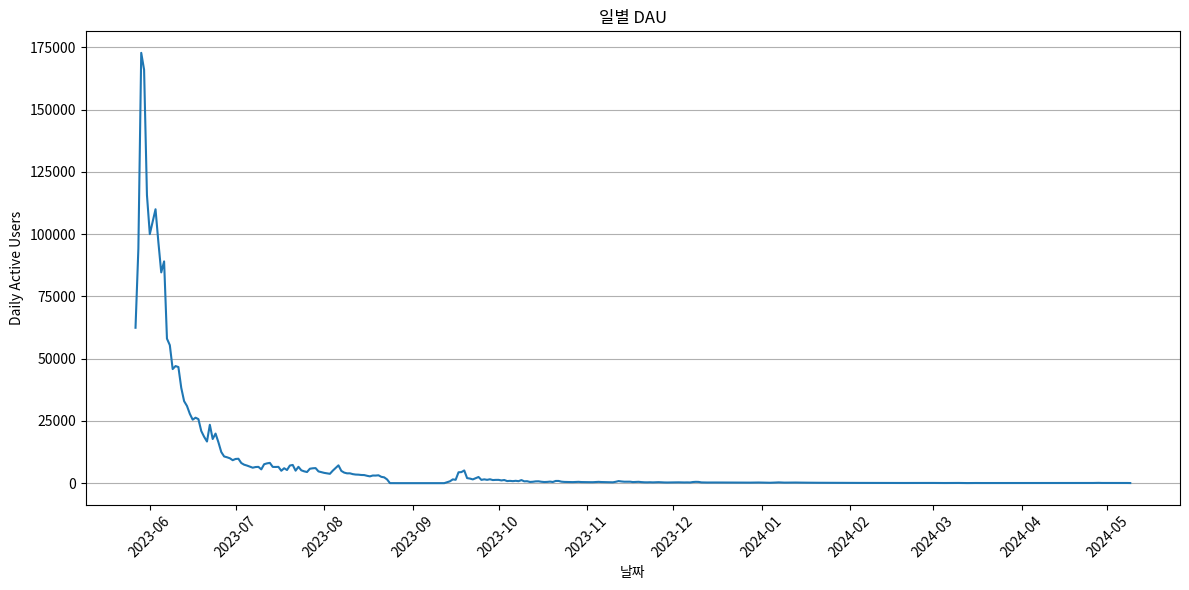

In [ ]:
# DAU Î≥ÄÌôî 
plt.figure(figsize=(12, 6))
plt.plot(dau_mau['attendance_date'], dau_mau['DAU'], linestyle='-')
plt.title('ÏùºÎ≥Ñ DAU')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Daily Active Users')
plt.grid(True, axis='y')

# xÏ∂ïÏùÑ Ïõî Îã®ÏúÑÎ°ú ÍπîÎÅîÌïòÍ≤å
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Ïú†Ï†Ä ÌÉàÌá¥

In [ ]:
# csv Î∂àÎü¨Ïò§Í∏∞
user_withdraw = pd.read_csv("./data/accounts_userwithdraw.csv", encoding="utf-8")
user_withdraw

id        reason           created_at
0         42   Ïû¨Î∞åÎäî ÏßàÎ¨∏Ïù¥ ÏóÜÏñ¥ÏÑú  2023-03-29 13:22:12
1         43  Ìï®Íªò Ìï† ÏπúÍµ¨Í∞Ä ÏóÜÏñ¥ÏÑú  2023-03-29 13:24:59
2         44  Ìï®Íªò Ìï† ÏπúÍµ¨Í∞Ä ÏóÜÏñ¥ÏÑú  2023-03-29 13:53:32
3         45  Ìï®Íªò Ìï† ÏπúÍµ¨Í∞Ä ÏóÜÏñ¥ÏÑú  2023-03-29 13:54:03
4         46   Ïû¨Î∞åÎäî ÏßàÎ¨∏Ïù¥ ÏóÜÏñ¥ÏÑú  2023-03-30 00:31:19
...      ...           ...                  ...
70759  70889         Í∏∞ÌÉÄ Ïù¥Ïú†  2024-05-08 14:24:16
70760  70890  Ìï®Íªò Ìï† ÏπúÍµ¨Í∞Ä ÏóÜÏñ¥ÏÑú  2024-05-08 15:20:06
70761  70891   Ïû¨Î∞åÎäî ÏßàÎ¨∏Ïù¥ ÏóÜÏñ¥ÏÑú  2024-05-08 15:46:36
70762  70892         Í∏∞ÌÉÄ Ïù¥Ïú†  2024-05-09 08:29:09
70763  70893         Í∏∞ÌÉÄ Ïù¥Ïú†  2024-05-09 08:49:06

[70764 rows x 3 columns]

In [ ]:
user_withdraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70764 entries, 0 to 70763
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          70764 non-null  int64 
 1   reason      70764 non-null  object
 2   created_at  70764 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [ ]:
# datetime Î≥ÄÌôò 
user_withdraw['created_at'] = pd.to_datetime(user_withdraw['created_at'])

In [ ]:
# ÎÇ†Ïßú Í∏∞Ï§Ä Ïª¨Îüº ÏÉùÏÑ±ÌïòÍ∏∞ 
user_withdraw['date'] = user_withdraw['created_at'].dt.date
user_withdraw['week'] = user_withdraw['created_at'].dt.to_period('W').apply(lambda r: r.start_time) # Ï£º ÏãúÏûë ÎÇ†ÏßúÎ•º Ï∂îÏ∂úÌï¥ ÌëúÍ∏∞
user_withdraw['month'] = user_withdraw['created_at'].dt.to_period('M').dt.to_timestamp() # ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ timestampÎ°ú Î≥ÄÌôò Ï∂îÏ∂ú

user_withdraw

id        reason          created_at        date       week  \
0         42   Ïû¨Î∞åÎäî ÏßàÎ¨∏Ïù¥ ÏóÜÏñ¥ÏÑú 2023-03-29 13:22:12  2023-03-29 2023-03-27   
1         43  Ìï®Íªò Ìï† ÏπúÍµ¨Í∞Ä ÏóÜÏñ¥ÏÑú 2023-03-29 13:24:59  2023-03-29 2023-03-27   
2         44  Ìï®Íªò Ìï† ÏπúÍµ¨Í∞Ä ÏóÜÏñ¥ÏÑú 2023-03-29 13:53:32  2023-03-29 2023-03-27   
3         45  Ìï®Íªò Ìï† ÏπúÍµ¨Í∞Ä ÏóÜÏñ¥ÏÑú 2023-03-29 13:54:03  2023-03-29 2023-03-27   
4         46   Ïû¨Î∞åÎäî ÏßàÎ¨∏Ïù¥ ÏóÜÏñ¥ÏÑú 2023-03-30 00:31:19  2023-03-30 2023-03-27   
...      ...           ...                 ...         ...        ...   
70759  70889         Í∏∞ÌÉÄ Ïù¥Ïú† 2024-05-08 14:24:16  2024-05-08 2024-05-06   
70760  70890  Ìï®Íªò Ìï† ÏπúÍµ¨Í∞Ä ÏóÜÏñ¥ÏÑú 2024-05-08 15:20:06  2024-05-08 2024-05-06   
70761  70891   Ïû¨Î∞åÎäî ÏßàÎ¨∏Ïù¥ ÏóÜÏñ¥ÏÑú 2024-05-08 15:46:36  2024-05-08 2024-05-06   
70762  70892         Í∏∞ÌÉÄ Ïù¥Ïú† 2024-05-09 08:29:09  2024-05-09 2024-05-06   
70763  70893         Í∏∞ÌÉÄ Ïù¥Ïú† 2024-05-09 08:49:06  2024-05-09 2024-05-06   

           month  
0     2023-03-01  
1     2023-03-01  
2     2023-03-01  
3     2023-03-01  
4     2023-03-01  
...          ...  
70759 2024-05-01  
70760 2024-05-01  
70761 2024-05-01  
70762 2024-05-01  
70763 2024-05-01  

[70764 rows x 6 columns]

In [ ]:
# ÏùºÎ≥Ñ, Ï£ºÎ≥Ñ, ÏõîÎ≥Ñ ÌÉàÌá¥ Ïàò ÏßëÍ≥ÑÌïòÍ∏∞ 
daily_withdraw = user_withdraw.groupby('date').size()
weekly_withdraw = user_withdraw.groupby('week').size()
monthly_withdraw = user_withdraw.groupby('month').size()

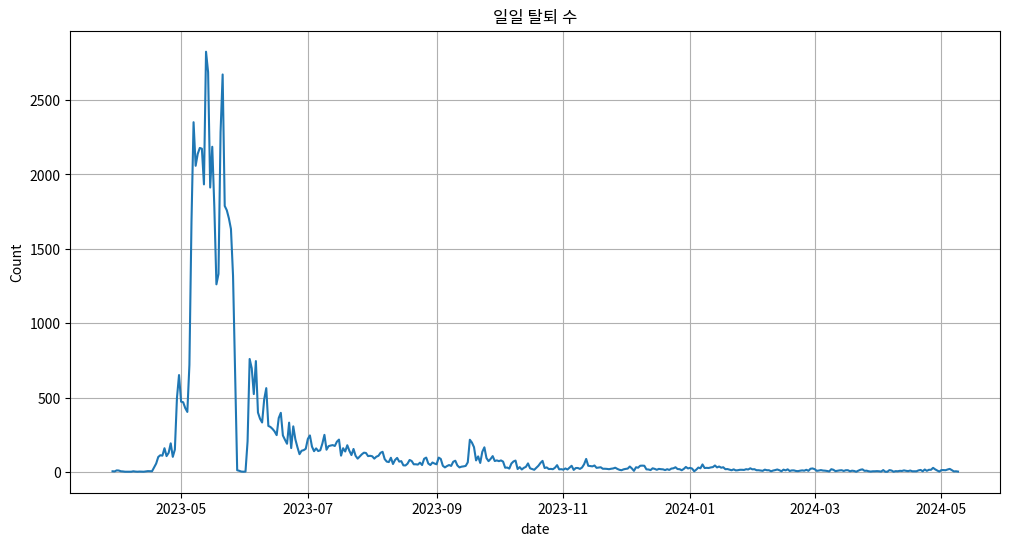

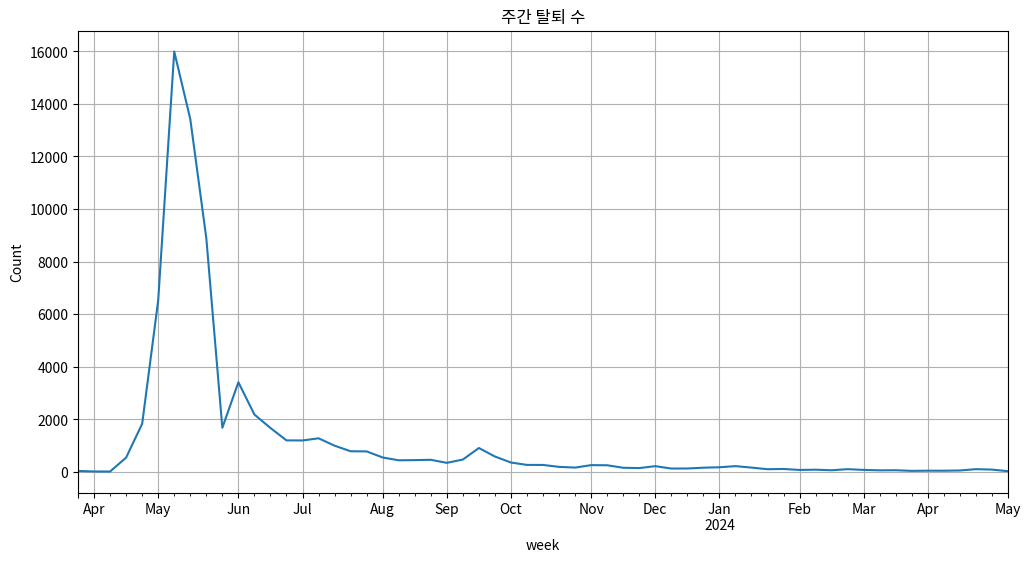

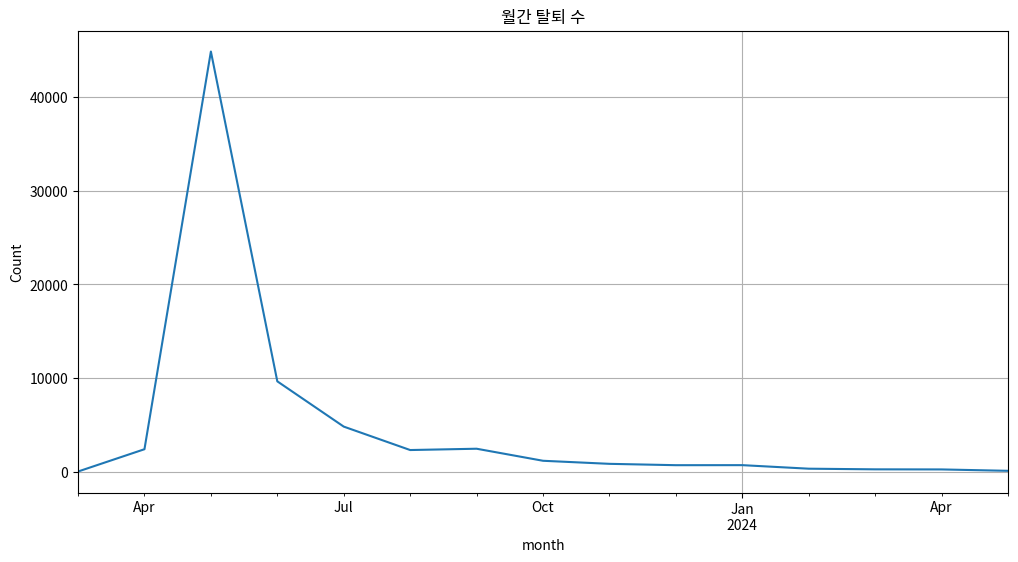

In [ ]:
# ÏùºÏùº ÌÉàÌá¥ Ïàò
plt.figure(figsize=(12, 6))
daily_withdraw.plot()
plt.title('ÏùºÏùº ÌÉàÌá¥ Ïàò')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Ï£ºÍ∞Ñ ÌÉàÌá¥ Ïàò
plt.figure(figsize=(12, 6))
weekly_withdraw.plot()
plt.title('Ï£ºÍ∞Ñ ÌÉàÌá¥ Ïàò')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# ÏõîÍ∞Ñ ÌÉàÌá¥ Ïàò
plt.figure(figsize=(12, 6))
monthly_withdraw.plot()
plt.title('ÏõîÍ∞Ñ ÌÉàÌá¥ Ïàò')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### ÏãúÍ∞ÑÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò
- `user` ÌÖåÏù¥Î∏îÏóêÏÑú created_at ÎÇ†ÏßúÎ≥ÑÎ°ú user Ïàò ÏßëÍ≥ÑÌïú ÌÖåÏù¥Î∏î 

In [ ]:
user_created = pd.read_csv('./data/user_created.csv', encoding = "utf-8")
user_created 

date_only  user_count
0    2023-03-29          11
1    2023-03-31          22
2    2023-04-01          16
3    2023-04-02           1
4    2023-04-03           5
..          ...         ...
401  2024-05-05          13
402  2024-05-06           6
403  2024-05-07           3
404  2024-05-08           1
405  2024-05-09           4

[406 rows x 2 columns]

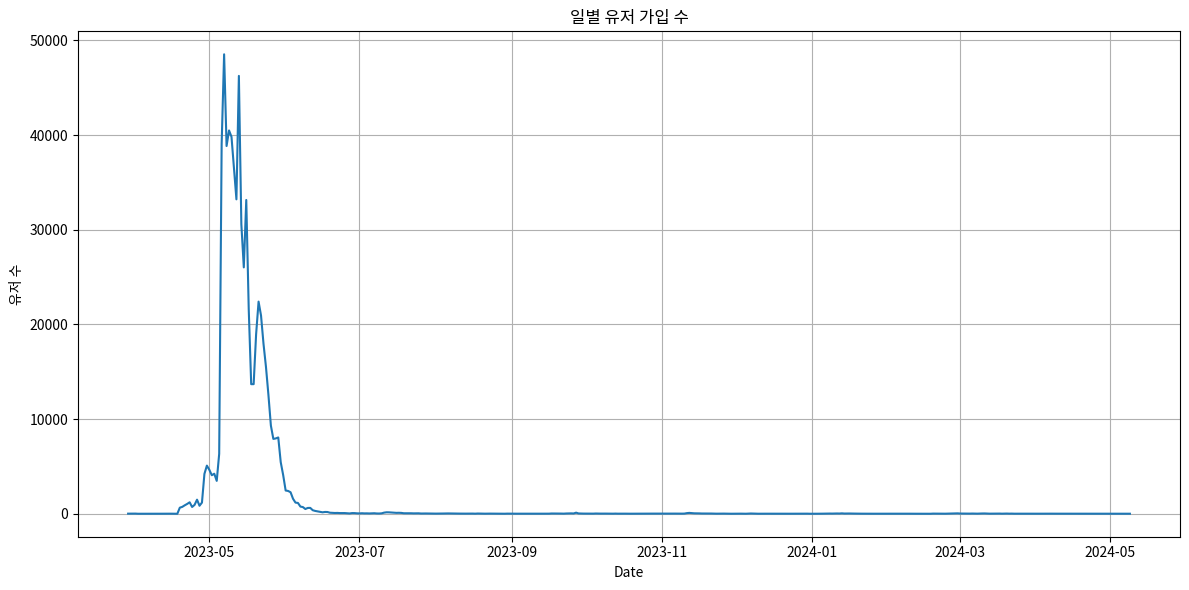

In [ ]:
# date_only Ïª¨Îüº datetimeÏúºÎ°ú Î≥ÄÌôò 
user_created['date_only'] = pd.to_datetime(user_created['date_only'])

# ÏãúÍ∞ÅÌôî 
plt.figure(figsize = (12,6))
plt.plot(user_created['date_only'], user_created['user_count'])
plt.title('ÏùºÎ≥Ñ Ïú†Ï†Ä Í∞ÄÏûÖ Ïàò')
plt.xlabel('Date')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Ï£ºÎ≥Ñ ÏßëÍ≥ÑÌïòÍ∏∞ 
user_created['week'] = user_created['date_only'].dt.to_period('W').apply(lambda r: r.start_time)

user_created_weekly = user_created.groupby('week')['user_count'].sum().reset_index()
user_created_weekly

week  user_count
0  2023-03-27          50
1  2023-04-03          30
2  2023-04-10          27
3  2023-04-17        4518
4  2023-04-24       14468
5  2023-05-01      110341
6  2023-05-08      265824
7  2023-05-15      149564
8  2023-05-22       92182
9  2023-05-29       26313
10 2023-06-05        5518
11 2023-06-12        1647
12 2023-06-19         589
13 2023-06-26         355
14 2023-07-03         268
15 2023-07-10         799
16 2023-07-17         446
17 2023-07-24         222
18 2023-07-31         163
19 2023-08-07         145
20 2023-08-14         106
21 2023-08-21          97
22 2023-08-28          59
23 2023-09-04          71
24 2023-09-11          78
25 2023-09-18         175
26 2023-09-25         272
27 2023-10-02         118
28 2023-10-09          88
29 2023-10-16          68
30 2023-10-23         100
31 2023-10-30          90
32 2023-11-06         231
33 2023-11-13         285
34 2023-11-20         116
35 2023-11-27          56
36 2023-12-04          77
37 2023-12-11          48
38 2023-12-18          42
39 2023-12-25          38
40 2024-01-01          72
41 2024-01-08         188
42 2024-01-15         123
43 2024-01-22          54
44 2024-01-29          52
45 2024-02-05          34
46 2024-02-12          25
47 2024-02-19          70
48 2024-02-26         154
49 2024-03-04         133
50 2024-03-11         107
51 2024-03-18          91
52 2024-03-25          53
53 2024-04-01          53
54 2024-04-08          42
55 2024-04-15          46
56 2024-04-22          43
57 2024-04-29          47
58 2024-05-06          14

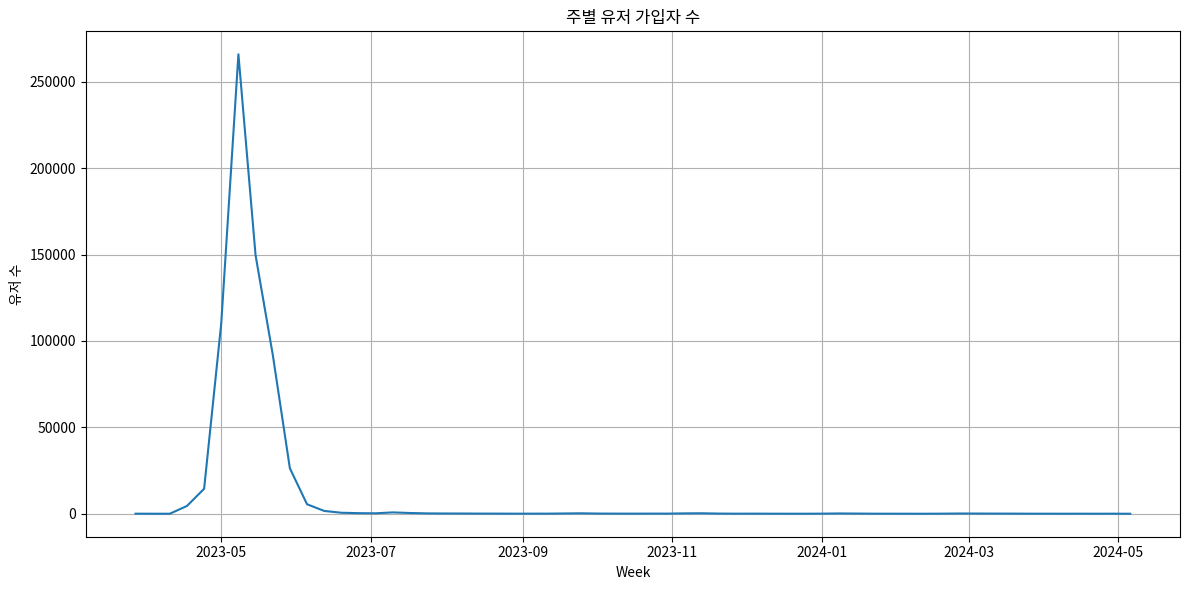

In [ ]:
# Ï£ºÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12,6))
plt.plot(user_created_weekly['week'], user_created_weekly['user_count'])
plt.title('Ï£ºÎ≥Ñ Ïú†Ï†Ä Í∞ÄÏûÖÏûê Ïàò')
plt.xlabel('Week')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# ÏõîÎ≥ÑÎ°ú ÏßëÍ≥ÑÌïòÍ∏∞
user_created['month'] = user_created['date_only'].dt.to_period('M')

user_created_monthly = user_created.groupby('month')['user_count'].sum().reset_index()
user_created_monthly['month'] = user_created_monthly['month'].astype(str)
user_created_monthly

month  user_count
0   2023-03          33
1   2023-04       19060
2   2023-05      635505
3   2023-06       16737
4   2023-07        1849
5   2023-08         524
6   2023-09         605
7   2023-10         409
8   2023-11         731
9   2023-12         231
10  2024-01         455
11  2024-02         255
12  2024-03         446
13  2024-04         196
14  2024-05          49

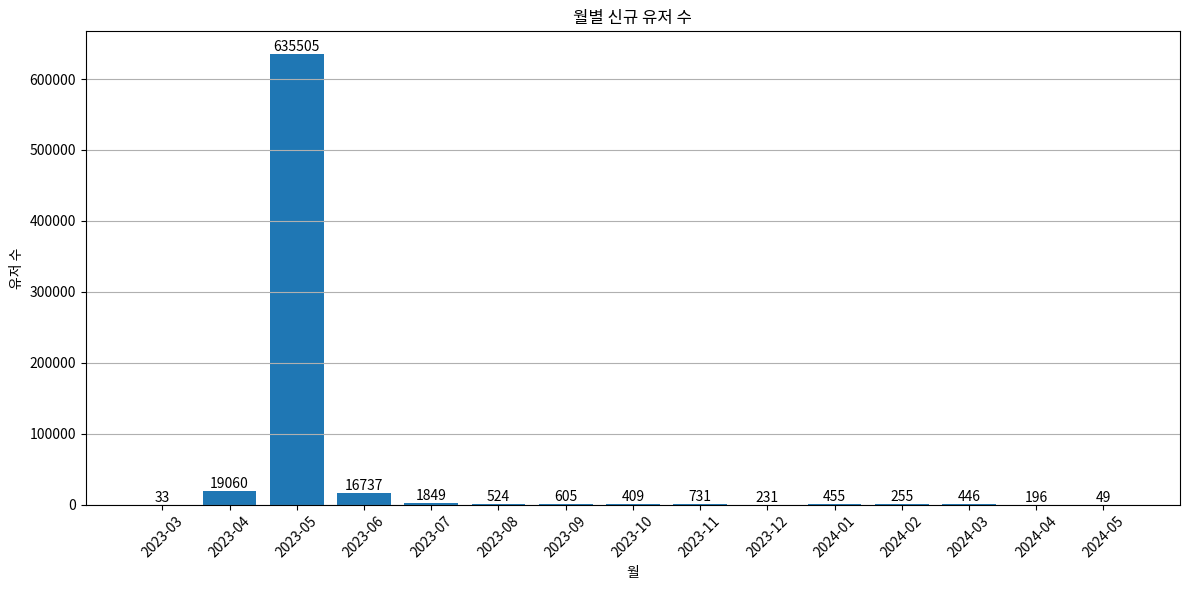

In [ ]:
# ÏõîÎ≥Ñ Í∞ÄÏûÖÏûê Ïàò ÏßëÍ≥Ñ ÏãúÍ∞ÅÌôî 
plt.figure(figsize=(12,6))

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ
bars = plt.bar(user_created_monthly['month'], user_created_monthly['user_count'])

# xÏ∂ï ÎààÍ∏à: Îß§Îã¨ ÌëúÏãú
plt.xticks(user_created_monthly['month'], rotation=45)

# ÌÉÄÏù¥ÌãÄ Î∞è Ï∂ï Î†àÏù¥Î∏î
plt.title('ÏõîÎ≥Ñ Ïã†Í∑ú Ïú†Ï†Ä Ïàò')
plt.xlabel('Ïõî')
plt.ylabel('Ïú†Ï†Ä Ïàò')
plt.grid(axis='y')

# ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Ìà¨Ìëú ÏßàÎ¨∏ Ïàò Ï°∞Ï†ïÌïòÍ∏∞

In [ ]:
user_question_record = pd.read_csv('./data/accounts_userquestionrecord.csv', encoding='utf-8')
user_question_record.head()

id status           created_at  chosen_user_id  question_id  user_id  \
0  771777      C  2023-04-28 12:27:49          849469          252   849436   
1  771800      C  2023-04-28 12:28:02          849446          244   849436   
2  771812      C  2023-04-28 12:28:09          849454          183   849436   
3  771828      C  2023-04-28 12:28:16          847375          101   849436   
4  771851      C  2023-04-28 12:28:26          849477          209   849436   

   question_piece_id  has_read answer_status    answer_updated_at  \
0             998458         0             N  2023-04-28 12:27:49   
1             998459         0             N  2023-04-28 12:28:02   
2             998460         1             N  2023-04-28 12:28:09   
3             998461         0             N  2023-04-28 12:28:16   
4             998462         1             N  2023-04-28 12:28:26   

   report_count  opened_times  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0

In [ ]:
user_question_record.duplicated(subset='question_id').sum()

1212753

In [ ]:
user_question_record.duplicated(subset='question_piece_id').sum()

0

- Ìà¨ÌëúÏûêÍ∞Ä Ìïú Î≤à Ìà¨ÌëúÎ•º Ìï† Îïå ***10Í∞úÏùò ÏßàÎ¨∏Ïóê Î™®Îëê Ìà¨ÌëúÌñàÎäîÏßÄÎ•º*** ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïúÎã§. 
- Î∂àÌïÑÏöîÌïú Ïª¨Îüº: 'status', 'chosen_id', 'has_read', 'answer_status', 'answer_updqted_at', 'report_count', 'opened_times'

In [ ]:
user_qr = user_question_record.drop(['status', 'chosen_user_id', 'has_read', 'answer_status', 'answer_updated_at', 'report_count', 'opened_times'], axis =1)
user_qr

id           created_at  question_id  user_id  \
0           771777  2023-04-28 12:27:49          252   849436   
1           771800  2023-04-28 12:28:02          244   849436   
2           771812  2023-04-28 12:28:09          183   849436   
3           771828  2023-04-28 12:28:16          101   849436   
4           771851  2023-04-28 12:28:26          209   849436   
...            ...                  ...          ...      ...   
1217553  161666166  2024-05-07 11:29:07         2614  1001607   
1217554  161666461  2024-05-08 01:34:56         1679   855525   
1217555  161666462  2024-05-08 01:35:02         2605   855525   
1217556  161666463  2024-05-08 01:36:00         3801   855525   
1217557  161666464  2024-05-08 01:36:18         3117   855525   

         question_piece_id  
0                   998458  
1                   998459  
2                   998460  
3                   998461  
4                   998462  
...                    ...  
1217553          190864020  
1217554          200139931  
1217555          200139932  
1217556          200139933  
1217557          200139934  

[1217558 rows x 5 columns]

In [ ]:
# Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò 
user_qr['created_at'] = pd.to_datetime(user_qr['created_at'])

# Ìà¨Ìëú ÎÇ†ÏßúÎßå Îî∞Î°ú Ï∂îÏ∂ú
user_qr['date'] = user_qr['created_at'].dt.date

user_qr

id          created_at  question_id  user_id  \
0           771777 2023-04-28 12:27:49          252   849436   
1           771800 2023-04-28 12:28:02          244   849436   
2           771812 2023-04-28 12:28:09          183   849436   
3           771828 2023-04-28 12:28:16          101   849436   
4           771851 2023-04-28 12:28:26          209   849436   
...            ...                 ...          ...      ...   
1217553  161666166 2024-05-07 11:29:07         2614  1001607   
1217554  161666461 2024-05-08 01:34:56         1679   855525   
1217555  161666462 2024-05-08 01:35:02         2605   855525   
1217556  161666463 2024-05-08 01:36:00         3801   855525   
1217557  161666464 2024-05-08 01:36:18         3117   855525   

         question_piece_id        date  
0                   998458  2023-04-28  
1                   998459  2023-04-28  
2                   998460  2023-04-28  
3                   998461  2023-04-28  
4                   998462  2023-04-28  
...                    ...         ...  
1217553          190864020  2024-05-07  
1217554          200139931  2024-05-08  
1217555          200139932  2024-05-08  
1217556          200139933  2024-05-08  
1217557          200139934  2024-05-08  

[1217558 rows x 6 columns]

In [ ]:
# Ï†ïÎ†¨ÌïòÍ∏∞
user_qr.sort_values(by= ['date','user_id','created_at'], ascending=[True, True, True]).head(50)

id          created_at  question_id  user_id  question_piece_id  \
903   787701 2023-04-28 14:18:07          161   838642            1023129   
905   787723 2023-04-28 14:18:16          286   838642            1023130   
908   787755 2023-04-28 14:18:29          203   838642            1023131   
910   787773 2023-04-28 14:18:36          265   838642            1023132   
912   787795 2023-04-28 14:18:45          307   838642            1023133   
913   787812 2023-04-28 14:18:54          149   838642            1023134   
915   787829 2023-04-28 14:19:00          191   838642            1023135   
917   787846 2023-04-28 14:19:08          237   838642            1023136   
919   787868 2023-04-28 14:19:21          202   838642            1023137   
6     771894 2023-04-28 12:28:46          247   847375             998689   
8     771912 2023-04-28 12:28:57          228   847375             998691   
9     771927 2023-04-28 12:29:05          188   847375             998693   
13    771969 2023-04-28 12:29:30          133   847375             998695   
15    771981 2023-04-28 12:29:38          152   847375             998697   
18    772002 2023-04-28 12:29:53          312   847375             998699   
20    772025 2023-04-28 12:30:04           99   847375             998700   
24    772044 2023-04-28 12:30:13          261   847375             998702   
26    772056 2023-04-28 12:30:20          177   847375             998704   
29    772088 2023-04-28 12:30:34          195   847375             998706   
423   779897 2023-04-28 13:26:49          209   847375             999088   
426   779930 2023-04-28 13:27:00          254   847375             999089   
431   779964 2023-04-28 13:27:10          238   847375             999090   
439   780017 2023-04-28 13:27:24          145   847375             999091   
441   780060 2023-04-28 13:27:35          269   847375             999092   
446   780091 2023-04-28 13:27:44          253   847375             999093   
453   780153 2023-04-28 13:28:02          278   847375             999095   
457   780188 2023-04-28 13:28:13          292   847375             999096   
464   780232 2023-04-28 13:28:24          103   847375             999097   
916   787838 2023-04-28 14:19:04          205   847375            1012558   
921   787872 2023-04-28 14:19:22          223   847375            1012559   
923   787890 2023-04-28 14:19:33          112   847375            1012560   
924   787912 2023-04-28 14:19:46          133   847375            1012561   
925   787926 2023-04-28 14:19:54          268   847375            1012562   
928   787965 2023-04-28 14:20:17          288   847375            1012564   
930   787984 2023-04-28 14:20:29          113   847375            1012565   
935   788014 2023-04-28 14:20:45          279   847375            1012566   
939   788064 2023-04-28 14:21:07          128   847375            1012567   
1343  795717 2023-04-28 15:11:55          266   847375            1023778   
1347  795745 2023-04-28 15:12:12          134   847375            1023779   
1352  795767 2023-04-28 15:12:23          166   847375            1023780   
1356  795788 2023-04-28 15:12:32          305   847375            1023781   
1360  795811 2023-04-28 15:12:43          141   847375            1023782   
1366  795845 2023-04-28 15:12:57          303   847375            1023783   
1371  795869 2023-04-28 15:13:04          161   847375            1023784   
1375  795889 2023-04-28 15:13:11          225   847375            1023785   
1382  795914 2023-04-28 15:13:20          220   847375            1023786   
1389  795966 2023-04-28 15:13:38          111   847375            1023787   
3095  815798 2023-04-28 23:30:47          306   847375            1034708   
3096  815812 2023-04-28 23:31:07          212   847375            1034710   
3097  815819 2023-04-28 23:31:19          320   847375            1034711   

            date  
903   2023-04-28  
905   2023-04-28  
908   2023-04-28  
910   

- ÎÇ†Ïßú Ïàú, Ïú†Ï†Ä Ïàú, ÏãúÍ∞Ñ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÎãà ÌïòÎÇòÏùò Ïú†Ï†ÄÍ∞Ä ÌïòÎ£®ÎèôÏïà Ï∞∏Ïó¨Ìïú Î™®Îì† ÏßàÎ¨∏Îì§Ïù¥ ÏàúÏÑúÎåÄÎ°ú ÎÇòÏôÄÏÑú Î∞îÎ°ú ÏÑ∏Ìä∏ Íµ¨Î∂ÑÏùÑ ÌïòÍ∏∞ Ïñ¥Î†µÎã§. 
> ÏãúÍ∞Ñ Í∞ÑÍ≤©ÏùÑ Í≥ÑÏÇ∞Ìï¥Î≥¥Ïûê.
- ÎÇ†Ïßú ÏàúÏúºÎ°ú Íµ¨Î∂ÑÌïòÎ©¥ ÏûêÏ†ï ÎÑòÏñ¥Í∞à Îïå Ï∞∏Ïó¨Ìïú ÏÑ∏Ìä∏Í∞Ä Îã§Î•∏ ÏÑ∏Ìä∏Î°ú Î∂ÑÎ¶¨ÎêòÏñ¥ Î≤ÑÎ¶∞Îã§. 
> ÎÇ†Ïßú ÏàúÏúºÎ°úÎäî Î®ºÏ†Ä Íµ¨Î∂ÑÌï† ÌïÑÏöî ÏóÜÏùÑ ÎìØ ÌïòÍ≥† Ïú†Ï†Ä Ïàú, ÏãúÍ∞Ñ ÏàúÏúºÎ°úÎßå Íµ¨Î∂ÑÌïú Îã§Ïùå ÏãúÍ∞Ñ Í∞ÑÍ≤©ÏúºÎ°ú ÏÑ∏Ìä∏Î•º Í≥ÑÏÇ∞ÌïòÎäîÍ≤å ÎÇ´Í≤†Îã§. 

>> Í∑∏ÎÉ• polls_questionsetÏóê set_id ÏûàÏñ¥ÏÑú Î®∏ÏßÄÌïòÍ∏∞Î°ú ÌñàÎã§. Ï†úÏùº Ï†ïÌôïÌïòÎã§


In [ ]:
# date Ïª¨Îüº Í∑∏ÎÉ• ÏÇ≠Ï†úÌïòÍ≥†, Ïú†Ï†Ä Ïàú, ÏãúÍ∞Ñ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÍ∏∞
user_qr = user_qr.drop(['date'], axis=1)
user_qr = user_qr.sort_values(by= ['user_id', 'created_at'], ascending=[True, True])
user_qr.head(30)

id          created_at  question_id  user_id  question_piece_id
12411  1010814 2023-04-29 16:22:56          121   838023            1167335
16684  1105460 2023-04-30 04:04:50          224   838023            1327698
16686  1105509 2023-04-30 04:05:01          121   838023            1327699
16687  1105536 2023-04-30 04:05:08          310   838023            1327700
16689  1105598 2023-04-30 04:05:22          203   838023            1327702
16701  1105877 2023-04-30 04:06:24          164   838023            1327703
16863  1109590 2023-04-30 04:18:56          144   838023            1327706
45401  1977214 2023-05-02 05:49:35          180   838023            1453455
63308  2580171 2023-05-03 08:35:26          524   838023            2574132
63328  2580439 2023-05-03 08:36:01          344   838023            2574143
63332  2580485 2023-05-03 08:36:09          199   838023            2574147
68545  2687691 2023-05-03 12:22:39          138   838023            3334998
68552  2687742 2023-05-03 12:22:44          524   838023            3334999
68556  2687785 2023-05-03 12:22:49          493   838023            3335000
68566  2687835 2023-05-03 12:22:54          433   838023            3335001
68572  2687883 2023-05-03 12:23:00          455   838023            3335002
68580  2687953 2023-05-03 12:23:08          262   838023            3335004
68588  2688041 2023-05-03 12:23:17          486   838023            3335007
88895  3057714 2023-05-04 07:25:53          290   838023            3477138
88899  3057781 2023-05-04 07:26:04          322   838023            3477141
88901  3057875 2023-05-04 07:26:17          266   838023            3477145
88902  3057924 2023-05-04 07:26:25          137   838023            3477147
55708  2360800 2023-05-02 22:42:05          298   838466            3059298
55710  2360891 2023-05-02 22:42:14          101   838466            3059299
55713  2360974 2023-05-02 22:42:23          229   838466            3059300
55716  2361045 2023-05-02 22:42:31          507   838466            3059301
55719  2361159 2023-05-02 22:42:41          414   838466            3059302
55722  2361316 2023-05-02 22:42:59          259   838466            3059304
55724  2361418 2023-05-02 22:43:09          278   838466            3059305
55727  2361540 2023-05-02 22:43:21          124   838466            3059306

In [ ]:
# polls_questionset ÌÖåÏù¥Î∏î Í∞ÄÏ†∏Ïò§Í∏∞ 
question_set = pd.read_csv('./data/polls_questionset.csv', encoding='utf-8')
question_set.head()

id  \
0  99817   
1  99830   
2  99840   
3  99841   
4  99848   

                                                             question_piece_id_list  \
0  [998458, 998459, 998460, 998461, 998462, 998463, 998464, 998465, 998466, 998467]   
1  [998588, 998589, 998590, 998591, 998592, 998593, 998594, 998595, 998596, 998597]   
2  [998689, 998691, 998693, 998695, 998697, 998699, 998700, 998702, 998704, 998706]   
3  [998688, 998690, 998692, 998694, 998696, 998698, 998701, 998703, 998705, 998707]   
4  [998768, 998769, 998770, 998771, 998772, 998773, 998774, 998775, 998776, 998777]   

          opening_time status           created_at  user_id  
0  2023-04-28 12:27:22      F  2023-04-28 12:27:23   849436  
1  2023-04-28 12:28:07      F  2023-04-28 12:28:07   849438  
2  2023-04-28 12:28:38      F  2023-04-28 12:28:38   847375  
3  2023-04-28 12:28:38      F  2023-04-28 12:28:38   849446  
4  2023-04-28 12:28:57      F  2023-04-28 12:28:57   849477

In [ ]:
question_set.groupby("id")["user_id"].nunique()

id
99817       1
99830       1
99840       1
99841       1
99848       1
           ..
20838253    1
20838344    1
20838419    1
20838445    1
20838446    1
Name: user_id, Length: 158384, dtype: int64

- ÌïòÎÇòÏùò id(set_id)ÏóêÎäî Ìïú Î™ÖÏùò Ïú†Ï†ÄÎßå Ìï†ÎãπÎêòÏóàÎã§. 

In [ ]:
# Ïª¨ÎüºÎ™Ö Î≥ÄÍ≤ΩÌïòÍ∏∞ (id -> set_id)
question_set = question_set.rename(columns = {'id' : 'set_id'}) 

# question_piece_id_list ÏßÑÏßú Î¶¨Ïä§Ìä∏Î°ú Ìòï Î≥ÄÌôòÌïòÍ∏∞
import ast  
question_set['question_piece_id_list'] = question_set['question_piece_id_list'].apply(ast.literal_eval)

# Î¶¨Ïä§Ìä∏ Ï†ïÍ∑úÌôîÌïòÍ∏∞ 
question_set_norm = question_set.explode('question_piece_id_list')
question_set_norm = question_set_norm.rename(columns = {'question_piece_id_list' : 'question_piece_id'})

# Î∂àÌïÑÏöîÌïú Ïó¥ ÏÇ≠Ï†úÌïòÍ∏∞ 
question_set_norm = question_set_norm.drop(['created_at', 'opening_time'], axis=1)

question_set_norm.head()

set_id question_piece_id status  user_id
0   99817            998458      F   849436
0   99817            998459      F   849436
0   99817            998460      F   849436
0   99817            998461      F   849436
0   99817            998462      F   849436

In [ ]:
len(question_set_norm)

1583840

In [ ]:
# user_id, question_piece_idÎ•º Í∏∞Ï§ÄÏúºÎ°ú mergeÌïòÍ∏∞: user_qrÏóê set_id Ï∂îÍ∞ÄÌïòÍ∏∞
user_qr_set = pd.merge(user_qr, question_set_norm, how='left', on=['user_id','question_piece_id'])

# set_idÍ∞Ä ÏóÜÎäî Ìñâ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞
user_qr_set['set_id'].isna().sum()

0

In [ ]:
user_qr_set

id          created_at  question_id  user_id  \
0          1010814 2023-04-29 16:22:56          121   838023   
1          1105460 2023-04-30 04:04:50          224   838023   
2          1105509 2023-04-30 04:05:01          121   838023   
3          1105536 2023-04-30 04:05:08          310   838023   
4          1105598 2023-04-30 04:05:22          203   838023   
...            ...                 ...          ...      ...   
1217553  160418395 2023-08-05 13:19:15         3264  1579418   
1217554  161100138 2023-09-20 15:31:20         1487  1580578   
1217555  161100139 2023-09-20 15:31:38         3807  1580578   
1217556  161643072 2024-03-19 12:56:39         4975  1583358   
1217557  161643073 2024-03-19 12:57:17         3787  1583358   

        question_piece_id    set_id status  
0                 1167335    116704      F  
1                 1327698    132741      F  
2                 1327699    132741      F  
3                 1327700    132741      F  
4                 1327702    132741      F  
...                   ...       ...    ...  
1217553         206172529  20617176      F  
1217554         207530981  20753022      O  
1217555         207530984  20753022      O  
1217556         208351463  20835070      F  
1217557         208351468  20835070      F  

[1217558 rows x 7 columns]

In [ ]:
# set_id Î≥ÑÎ°ú Î™á Í∞úÏùò ÌñâÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ : set_id Îãπ Î™á Í∞úÏùò question_piece_idÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞
    # Ìïú ÏÑ∏Ìä∏ ÎÇ¥ÏóêÏÑú Ìà¨ÌëúÌïú ÏßàÎ¨∏ Ïàò = question_cnt Ïª¨Îüº
user_qr_cnt = user_qr_set.groupby(['set_id','user_id'])['question_piece_id'].nunique().reset_index(name='question_cnt').sort_values(by='question_cnt', ascending=False)
user_qr_cnt

set_id  user_id  question_cnt
0          99817   849436            10
52261    3954737  1101088            10
115586  12094100  1170559            10
52315    3960625  1158106            10
52317    3960857  1113966            10
...          ...      ...           ...
141834  17326660  1171866             1
141831  17324017   935887             1
141818  17322185   881242             1
129914  14745134  1381784             1
32718    1195473   856828             1

[152225 rows x 3 columns]

In [ ]:
# Ïù∏Îç±Ïä§ Ï¥àÍ∏∞ÌôîÌïòÍ∏∞ : Î≥¥Í∏∞ Ï¢ãÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú
user_qr_cnt = user_qr_cnt.reset_index(drop=True)
user_qr_cnt

set_id  user_id  question_cnt
0          99817   849436            10
1        3954737  1101088            10
2       12094100  1170559            10
3        3960625  1158106            10
4        3960857  1113966            10
...          ...      ...           ...
152220  17326660  1171866             1
152221  17324017   935887             1
152222  17322185   881242             1
152223  14745134  1381784             1
152224   1195473   856828             1

[152225 rows x 3 columns]

In [ ]:
user_qr_cnt['question_cnt'].describe()


count    152225.000000
mean          7.998410
std           2.262638
min           1.000000
25%           7.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: question_cnt, dtype: float64

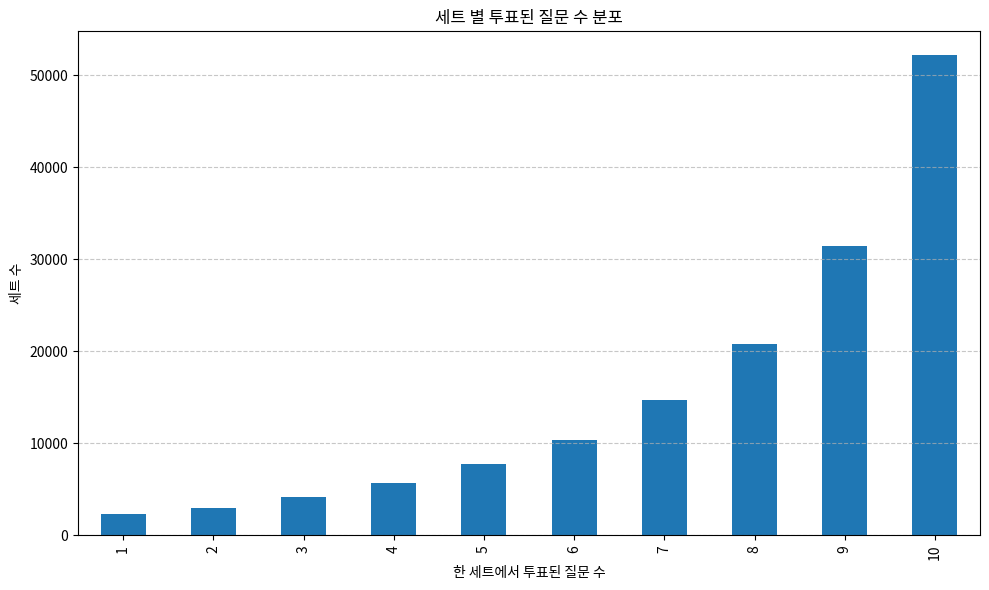

In [ ]:
# question_cnt Î≥ÑÎ°ú set_id Í∞úÏàò ÌôïÏù∏ÌïòÍ∏∞
count_dist = user_qr_cnt['question_cnt'].value_counts().sort_index()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
count_dist.plot(kind='bar')

plt.xlabel("Ìïú ÏÑ∏Ìä∏ÏóêÏÑú Ìà¨ÌëúÎêú ÏßàÎ¨∏ Ïàò")
plt.ylabel("ÏÑ∏Ìä∏ Ïàò")
plt.title("ÏÑ∏Ìä∏ Î≥Ñ Ìà¨ÌëúÎêú ÏßàÎ¨∏ Ïàò Î∂ÑÌè¨")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# ÎπÑÏú®Î°ú ÌôïÏù∏ÌïòÍ∏∞
count_pct = user_qr_cnt['question_cnt'].value_counts(normalize=True).sort_index() * 100
count_pct

question_cnt
1      1.491871
2      1.947118
3      2.753818
4      3.708326
5      5.117425
6      6.802431
7      9.626540
8     13.663327
9     20.625390
10    34.263754
Name: proportion, dtype: float64

In [ ]:
# ÎπàÎèÑÏôÄ ÎπÑÏú® Ìïú Î≤àÏóê Î≥¥Í∏∞ 
count_summary = pd.DataFrame({
    "set_count": user_qr_cnt['question_cnt'].value_counts().sort_index(),
    "percentage": count_pct
})

count_summary

set_count  percentage
question_cnt                       
1                  2271    1.491871
2                  2964    1.947118
3                  4192    2.753818
4                  5645    3.708326
5                  7790    5.117425
6                 10355    6.802431
7                 14654    9.626540
8                 20799   13.663327
9                 31397   20.625390
10                52158   34.263754

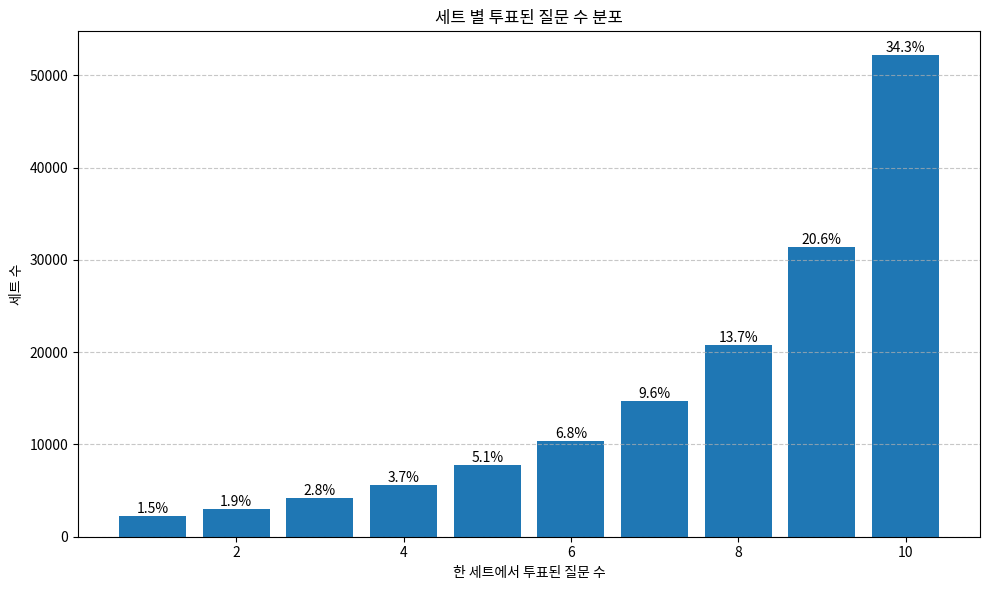

In [ ]:
# ÏãúÍ∞ÅÌôî 
plt.figure(figsize=(10, 6))
bars = plt.bar(count_summary.index, count_summary["set_count"])

# ÎßâÎåÄ ÏúÑÏóê ÌçºÏÑºÌä∏ ÎùºÎ≤® Î∂ôÏù¥Í∏∞
for bar, pct in zip(bars, count_summary["percentage"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{pct:.1f}%',  # ÏÜåÏàòÏ†ê 1ÏûêÎ¶¨ ÌçºÏÑºÌä∏
             ha='center', va='bottom', fontsize=10)

plt.xlabel("Ìïú ÏÑ∏Ìä∏ÏóêÏÑú Ìà¨ÌëúÎêú ÏßàÎ¨∏ Ïàò")
plt.ylabel("ÏÑ∏Ìä∏ Ïàò")
plt.title("ÏÑ∏Ìä∏ Î≥Ñ Ìà¨ÌëúÎêú ÏßàÎ¨∏ Ïàò Î∂ÑÌè¨")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Ìà¨Ìëú Í∞ÑÍ≤©ÏùÑ ÏÇ¥Ìé¥Î≥º ÌïÑÏöîÍ∞Ä ÏûàÏùÑ ÎìØ. 

In [ ]:
# created_at Ïª¨ÎüºÏùÑ datetimeÏúºÎ°ú Î≥ÄÌôòÌïòÍ∏∞
user_qr_set['created_at'] = pd.to_datetime(user_qr_set['created_at'])

# set_id Î≥ÑÎ°ú ÏãúÍ∞Ñ Ï†ïÎ†¨ ÌõÑ ÏãúÍ∞Ñ Í∞ÑÍ≤© Í≥ÑÏÇ∞ÌïòÍ∏∞: ÌïòÎÇòÏùò ÏÑ∏Ìä∏ ÎÇ¥ÏóêÏÑú Ìà¨Ìëú Í∞ÑÍ≤© Í≥ÑÏÇ∞ÌïòÍ∏∞ 
user_qr_set = user_qr_set.sort_values(by=["set_id", "created_at"])
user_qr_set["time_diff"] = user_qr_set.groupby("set_id")["created_at"].diff()

user_qr_set.head(30)

id          created_at  question_id  user_id question_piece_id  \
7257  771777 2023-04-28 12:27:49          252   849436            998458   
7258  771800 2023-04-28 12:28:02          244   849436            998459   
7259  771812 2023-04-28 12:28:09          183   849436            998460   
7260  771828 2023-04-28 12:28:16          101   849436            998461   
7261  771851 2023-04-28 12:28:26          209   849436            998462   
7262  771864 2023-04-28 12:28:32          239   849436            998463   
7263  771908 2023-04-28 12:28:55          146   849436            998464   
7264  771940 2023-04-28 12:29:13          297   849436            998465   
7265  771952 2023-04-28 12:29:21          294   849436            998466   
7266  771974 2023-04-28 12:29:33          201   849436            998467   
7895  771966 2023-04-28 12:29:29          237   849438            998588   
7896  771995 2023-04-28 12:29:49          138   849438            998589   
7897  772027 2023-04-28 12:30:04          184   849438            998590   
7898  772054 2023-04-28 12:30:19          157   849438            998591   
7899  772080 2023-04-28 12:30:29          276   849438            998592   
7900  772101 2023-04-28 12:30:39          135   849438            998593   
7901  772126 2023-04-28 12:30:49          257   849438            998594   
7902  772147 2023-04-28 12:31:01          280   849438            998595   
7903  772184 2023-04-28 12:31:18          251   849438            998597   
4093  771894 2023-04-28 12:28:46          247   847375            998689   
4094  771912 2023-04-28 12:28:57          228   847375            998691   
4095  771927 2023-04-28 12:29:05          188   847375            998693   
4096  771969 2023-04-28 12:29:30          133   847375            998695   
4097  771981 2023-04-28 12:29:38          152   847375            998697   
4098  772002 2023-04-28 12:29:53          312   847375            998699   
4099  772025 2023-04-28 12:30:04           99   847375            998700   
4100  772044 2023-04-28 12:30:13          261   847375            998702   
4101  772056 2023-04-28 12:30:20          177   847375            998704   
4102  772088 2023-04-28 12:30:34          195   847375            998706   
9101  772852 2023-04-28 12:35:18          205   849446            998694   

      set_id status       time_diff  
7257   99817      F             NaT  
7258   99817      F 0 days 00:00:13  
7259   99817      F 0 days 00:00:07  
7260   99817      F 0 days 00:00:07  
7261   99817      F 0 days 00:00:10  
7262   99817      F 0 days 00:00:06  
7263   99817      F 0 days 00:00:23  
7264   99817      F 0 days 00:00:18  
7265   99817      F 0 days 00:00:08  
7266   99817      F 0 days 00:00:12  
7895   99830      F             NaT  
7896   99830      F 0 days 00:00:20  
7897   99830      F 0 days 00:00:15  
7898   99830      F 0 days 00:00:15  
7899   99830      F 0 days 00:00:10  
7900   99830      F 0 days 00:00:10  
7901   99830      F 0 days 00:00:10  
7902   99830      F 0 days 00:00:12  
7903   99830      F 0 days 00:00:17  
4093   99840      F             NaT  
4094   99840      F 0 days 00:00:11  
4095   99840      F 0 days 00:00:08  
4096   99840      F 0 days 00:00:25  
4097   99840      F 0 days 00:00:08  
4098   99840      F 0 days 00:00:15  
4099   99840      F 0 days 00:00:11  
4100   99840      F 0 days 00:00:09  
4101   99840      F 0 days 00:00:07  
4102   99840      F 0 days 00:00:14  
9101   99841      F             NaT

In [ ]:
user_qr_set.describe()



id                     created_at   question_id  \
count  1.217558e+06                        1217558  1.217558e+06   
mean   5.957298e+07  2023-05-17 12:51:25.947101696  6.843895e+02   
min    7.717770e+05            2023-04-28 12:27:49  9.900000e+01   
25%    1.553965e+07            2023-05-10 01:42:11  2.750000e+02   
50%    5.302680e+07     2023-05-15 15:43:01.500000  4.690000e+02   
75%    9.480960e+07  2023-05-22 11:01:03.750000128  9.420000e+02   
max    1.616665e+08            2024-05-08 01:36:18  5.133000e+03   
std    4.608193e+07                            NaN  6.250399e+02   

            user_id        set_id                  time_diff  
count  1.217558e+06  1.217558e+06                    1065333  
mean   1.105790e+06  7.413177e+06  0 days 00:21:32.905700846  
min    8.380230e+05  9.981700e+04            0 days 00:00:00  
25%    8.846190e+05  1.854114e+06            0 days 00:00:07  
50%    1.117537e+06  6.616813e+06            0 days 00:00:09  
75%    1.259186e+06  1.176732e+07            0 days 00:00:14  
max    1.583358e+06  2.083507e+07          282 days 06:25:30  
std    2.062704e+05  5.757227e+06  0 days 21:51:47.605508827

### Í∞ÅÏ¢Ö Î≥¥Ï°∞ÏßÄÌëú Ï∂îÏ∂úÌïòÍ∏∞ 
DAU, D1 Î¶¨ÌÖêÏÖòÏú®, ÌèâÍ∑† ÏùëÎãµ Í∞ØÏàò, Î∞òÎ≥µ ÏÑ∏Ìä∏ Ï∞∏Ïó¨Ïú®


In [ ]:
user_qr_set.head()

id          created_at  question_id  user_id question_piece_id  \
7257  771777 2023-04-28 12:27:49          252   849436            998458   
7258  771800 2023-04-28 12:28:02          244   849436            998459   
7259  771812 2023-04-28 12:28:09          183   849436            998460   
7260  771828 2023-04-28 12:28:16          101   849436            998461   
7261  771851 2023-04-28 12:28:26          209   849436            998462   

      set_id status       time_diff  
7257   99817      F             NaT  
7258   99817      F 0 days 00:00:13  
7259   99817      F 0 days 00:00:07  
7260   99817      F 0 days 00:00:07  
7261   99817      F 0 days 00:00:10

In [ ]:
# DAU Í≥ÑÏÇ∞ÌïòÍ∏∞ : ÏùºÏûêÎ≥Ñ Í≥†Ïú† Ïú†Ï†Ä Ïàò
## Ìà¨Ìëú ÎÇ†Ïßú Ïª¨Îüº 'date' Ï∂îÍ∞ÄÌïòÍ∏∞ 
user_qr_set['date'] = user_qr_set['created_at'].dt.normalize()
## DAU Í≥ÑÏÇ∞ÌïòÍ∏∞
user_qr_set.groupby('date')['user_id'].nunique().reset_index(name='DAU')

# ÏÇ¨Ïã§ ÌïòÏßÑÎãò Îç∞Ïù¥ÌÑ∞ Ï∞∏Í≥†ÌïòÎ©¥ ÎêúÎã§ 

date  DAU
0   2023-04-28  125
1   2023-04-29  221
2   2023-04-30  325
3   2023-05-01  325
4   2023-05-02  413
..         ...  ...
268 2024-05-03    1
269 2024-05-05    1
270 2024-05-06    1
271 2024-05-07    2
272 2024-05-08    1

[273 rows x 2 columns]

In [ ]:
# D1 Î¶¨ÌÖêÏÖòÏú®ÏùÑ ÏÑ∏Ìä∏Î≥ÑÎ°ú Í≥ÑÏÇ∞ÌïòÍ∏∞
# Ïú†Ï†ÄÎ≥Ñ Ï∞∏Ïó¨ ÎÇ†Ïßú Î¶¨Ïä§Ìä∏ Ï†ïÎ¶¨
user_days = user_qr_set.groupby('user_id')['date'].apply(lambda x: sorted(set(x))).reset_index()

# D1 Î¶¨ÌÖêÏÖò Ïó¨Î∂Ä Í≥ÑÏÇ∞ Ìï®Ïàò
def has_d1(days):
    if len(days) < 2:
        return False
    return (pd.to_datetime(days[1]) - pd.to_datetime(days[0])).days == 1

user_days['d1_retained'] = user_days['date'].apply(has_d1)

# Ï†ÑÏ≤¥ ÌèâÍ∑†
d1_retention_rate = user_days['d1_retained'].mean()
print(f"D1 Î¶¨ÌÖêÏÖòÏú®: {d1_retention_rate:.2%}")

D1 Î¶¨ÌÖêÏÖòÏú®: 90.76%


In [ ]:
# ÌèâÍ∑† ÏùëÎãµ Í∞úÏàò
mean_cnt = user_qr_cnt['question_cnt'].mean()
print(f"ÌèâÍ∑† ÏùëÎãµ Í∞úÏàò: {mean_cnt:.2f}")


ÌèâÍ∑† ÏùëÎãµ Í∞úÏàò: 8.00


In [ ]:
# Î∞òÎ≥µ ÏÑ∏Ìä∏ Ï∞∏Ïó¨Ïú® Í≥ÑÏÇ∞ÌïòÍ∏∞         
set_counts = user_qr_set.groupby('user_id')['set_id'].nunique()
repeat_participation_rate = (set_counts > 1).mean()
print(f"Î∞òÎ≥µ ÏÑ∏Ìä∏ Ï∞∏Ïó¨Ïú®: {repeat_participation_rate:.2%}")


Î∞òÎ≥µ ÏÑ∏Ìä∏ Ï∞∏Ïó¨Ïú®: 97.26%


- ÏÑúÎπÑÏä§ Ï¥àÏ∞ΩÍ∏∞ÏóêÎäî Í∞ÄÏûÖÏûê, ÌôúÎèôÏûê ÏàòÍ∞Ä ÎßéÍ≥† ÎëêÏÑ∏Îã¨ Îí§ Í∏âÎùΩÌïòÎäî ÏñëÏÉÅÏù¥ÏóàÍ∏∞ ÎïåÎ¨∏Ïóê Îã®ÏàúÌïú D1 Î¶¨ÌÖêÏÖòÏú®, DAU, Î∞òÎ≥µ ÏÑ∏Ìä∏ Ï∞∏Ïó¨Ïú® Î≥¥Îã§Îäî `ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù`ÏùÑ ÌôúÏö©Ìï¥Ïïº ÏÑúÎπÑÏä§Ïùò ÏßÄÏÜçÏÑ±ÏùÑ Í≥ºÎåÄÌèâÍ∞ÄÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÎã§. 
- ÏµúÍ∑º ÏΩîÌò∏Ìä∏(1,2Îã¨Ïóê Ïú†ÏûÖÎêú Ïú†Ï†Ä)Îäî ÏïÑÏßÅ Îã§Ïùå Îã¨ ÌôúÎèô Ïó¨Î∂ÄÎ•º Ïïå Ïàò ÏóÜÏúºÎØÄÎ°ú Ï†úÏô∏ÌïòÍ±∞ÎÇò Î≥¥Ï°∞Î°ú ÌëúÏãúÌï¥Ïïº ÌïúÎã§. 
- Îî∞ÎùºÏÑú A/B ÌÖåÏä§Ìä∏ Ïó≠Ïãú ÏµúÍ∑º Ïú†ÏûÖÎêú Ïú†Ï†ÄÎì§ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏßÄÌëú Î≥ÄÌôîÎ•º ÏÇ¥Ìé¥Ïïº ÌïúÎã§. 

In [ ]:
user_qr_set.head()

id          created_at  question_id  user_id question_piece_id  \
7257  771777 2023-04-28 12:27:49          252   849436            998458   
7258  771800 2023-04-28 12:28:02          244   849436            998459   
7259  771812 2023-04-28 12:28:09          183   849436            998460   
7260  771828 2023-04-28 12:28:16          101   849436            998461   
7261  771851 2023-04-28 12:28:26          209   849436            998462   

      set_id status       time_diff       date  
7257   99817      F             NaT 2023-04-28  
7258   99817      F 0 days 00:00:13 2023-04-28  
7259   99817      F 0 days 00:00:07 2023-04-28  
7260   99817      F 0 days 00:00:07 2023-04-28  
7261   99817      F 0 days 00:00:10 2023-04-28

### Ïú†Ï†ÄÎ≥ÑÎ°ú Îß§Ïùº Ï∞∏Ïó¨Ìïú ÏÑ∏Ìä∏ Í∞ØÏàò Î™á Í∞†ÏßÄ ÏßëÍ≥ÑÌï¥Î≥¥Ïûê

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ, ÎÇ†ÏßúÎ≥Ñ, ÏÑ∏Ìä∏Î≥ÑÎ°ú Ï§ëÎ≥µ Ï†úÍ±∞
unique_sets = user_qr_set[['user_id', 'date', 'set_id']].drop_duplicates()

# Ïú†Ï†ÄÎ≥Ñ ÎÇ†ÏßúÎ≥Ñ Ï∞∏Ïó¨ ÏÑ∏Ìä∏ Ïàò ÏßëÍ≥Ñ
user_daily_set_cnt = unique_sets.groupby(['user_id', 'date'])['set_id'].count().reset_index(name='set_cnt')

# Í≤∞Í≥º ÌôïÏù∏
user_daily_set_cnt

user_id       date  set_cnt
0       838023 2023-04-29        1
1       838023 2023-04-30        1
2       838023 2023-05-02        1
3       838023 2023-05-03        2
4       838023 2023-05-04        1
...        ...        ...      ...
50969  1579418 2023-07-29        1
50970  1579418 2023-07-30        1
50971  1579418 2023-08-05        1
50972  1580578 2023-09-20        1
50973  1583358 2024-03-19        1

[50974 rows x 3 columns]

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ ÌïòÎ£® ÌèâÍ∑† ÏÑ∏Ìä∏ Ï∞∏Ïó¨ Ïàò Í≥ÑÏÇ∞
user_avg_set_per_day = user_daily_set_cnt.groupby('user_id')['set_cnt'].mean().reset_index(name='avg_set_per_day')

# Í≤∞Í≥º ÌôïÏù∏
user_avg_set_per_day

user_id  avg_set_per_day
0      838023         1.200000
1      838466         2.625000
2      838642         1.000000
3      839357         3.444444
4      840293         2.714286
...       ...              ...
4844  1577440         1.625000
4845  1578095         1.000000
4846  1579418         1.166667
4847  1580578         1.000000
4848  1583358         1.000000

[4849 rows x 2 columns]

In [ ]:
user_avg_set_per_day.describe()
# ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÌïòÎ£®Ïóê 2.9 ÏÑ∏Ìä∏Ïóê Ï∞∏Ïó¨Ìï®. 

user_id  avg_set_per_day
count  4.849000e+03      4849.000000
mean   1.109473e+06         2.949499
std    2.160293e+05         1.494945
min    8.380230e+05         1.000000
25%    8.851120e+05         1.884615
50%    1.116196e+06         2.647059
75%    1.275457e+06         3.687500
max    1.583358e+06        14.090909

Ïú†Ï†ÄÎ≥Ñ Í≥†Ïú† ÌôúÎèô ÎÇ†Ïßú Ïàò Í≥ÑÏÇ∞ÌïòÍ∏∞ 

In [ ]:
# Ïú†Ï†ÄÎ≥Ñ Í≥†Ïú† ÌôúÎèô ÎÇ†Ïßú Ïàò Í≥ÑÏÇ∞
user_active_days = user_qr_set.groupby("user_id")["date"].nunique().reset_index()

# Ïª¨Îüº Ïù¥Î¶Ñ Ï†ïÎ¶¨
user_active_days.columns = ["user_id", "active_days"]

# Í≤∞Í≥º ÌôïÏù∏
user_active_days

user_id  active_days
0      838023            5
1      838466            8
2      838642            2
3      839357            9
4      840293            7
...       ...          ...
4844  1577440            8
4845  1578095            4
4846  1579418            6
4847  1580578            1
4848  1583358            1

[4849 rows x 2 columns]

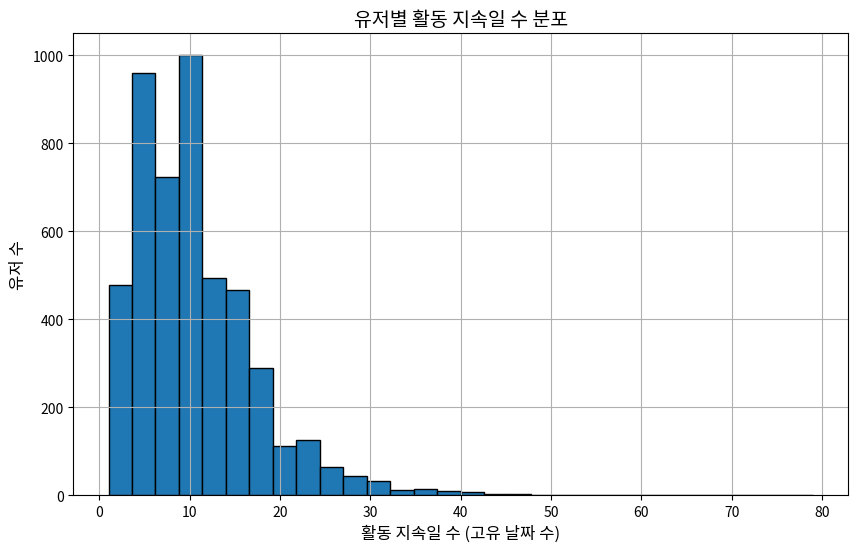

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(user_active_days["active_days"], bins=30, edgecolor='black')
plt.title("Ïú†Ï†ÄÎ≥Ñ ÌôúÎèô ÏßÄÏÜçÏùº Ïàò Î∂ÑÌè¨", fontsize=14)
plt.xlabel("ÌôúÎèô ÏßÄÏÜçÏùº Ïàò (Í≥†Ïú† ÎÇ†Ïßú Ïàò)", fontsize=12)
plt.ylabel("Ïú†Ï†Ä Ïàò", fontsize=12)
plt.grid(True)
plt.show()

### ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù: Î¶¨ÌÖêÏÖòÍ≥º Î∞òÎ≥µ Ï∞∏Ïó¨Ïú® Î∂ÑÏÑùÌïòÍ∏∞, ÌèâÍ∑† ÏùëÎãµÍ∞ØÏàò

In [ ]:
user_qr_set

id          created_at  question_id  user_id  \
7257        771777 2023-04-28 12:27:49          252   849436   
7258        771800 2023-04-28 12:28:02          244   849436   
7259        771812 2023-04-28 12:28:09          183   849436   
7260        771828 2023-04-28 12:28:16          101   849436   
7261        771851 2023-04-28 12:28:26          209   849436   
...            ...                 ...          ...      ...   
865901   161639783 2024-03-10 03:29:12         2049  1227249   
865902   161639784 2024-03-10 03:29:20          832  1227249   
865903   161639785 2024-03-10 03:30:47         1119  1227249   
1217556  161643072 2024-03-19 12:56:39         4975  1583358   
1217557  161643073 2024-03-19 12:57:17         3787  1583358   

        question_piece_id    set_id status       time_diff       date  
7257               998458     99817      F             NaT 2023-04-28  
7258               998459     99817      F 0 days 00:00:13 2023-04-28  
7259               998460     99817      F 0 days 00:00:07 2023-04-28  
7260               998461     99817      F 0 days 00:00:07 2023-04-28  
7261               998462     99817      F 0 days 00:00:10 2023-04-28  
...                   ...       ...    ...             ...        ...  
865901          208345628  20834486      F 0 days 00:00:12 2024-03-10  
865902          208345629  20834486      F 0 days 00:00:08 2024-03-10  
865903          208345630  20834486      F 0 days 00:01:27 2024-03-10  
1217556         208351463  20835070      F             NaT 2024-03-19  
1217557         208351468  20835070      F 0 days 00:00:38 2024-03-19  

[1217558 rows x 9 columns]

In [ ]:
# created_at Í∏∞Ï§Ä Ïú†Ï†ÄÎ≥Ñ Ï≤´ Ï∞∏Ïó¨ Îã¨: ÏΩîÌò∏Ìä∏ Ï†ïÏùò
first_day = user_qr_set.groupby('user_id')['created_at'].min().reset_index()
first_day['cohort_month'] = first_day['created_at'].dt.to_period('M')

# Ï≤´ Ï∞∏Ïó¨ ÏùºÎèÑ Ìè¨Ìï®ÌïòÏûê 
first_day['first_date'] = first_day['created_at'].dt.normalize()

first_day.head()

user_id          created_at cohort_month first_date
0   838023 2023-04-29 16:22:56      2023-04 2023-04-29
1   838466 2023-05-02 22:42:05      2023-05 2023-05-02
2   838642 2023-04-28 14:18:07      2023-04 2023-04-28
3   839357 2023-04-29 16:51:01      2023-04 2023-04-29
4   840293 2023-05-03 02:24:05      2023-05 2023-05-03

In [ ]:
# user_qr_setÏóê ÏΩîÌò∏Ìä∏ Ï†ïÎ≥¥ Ï∂îÍ∞ÄÌïòÍ∏∞ 
user_qr_set = pd.merge(user_qr_set, first_day[['user_id', 'cohort_month', 'first_date']], on='user_id', how='left')
user_qr_set['event_month'] = user_qr_set['created_at'].dt.to_period('M') # ÌôúÎèô Ïõî Ï∂îÍ∞Ä

user_qr_set.head()

id          created_at  question_id  user_id question_piece_id  set_id  \
0  771777 2023-04-28 12:27:49          252   849436            998458   99817   
1  771800 2023-04-28 12:28:02          244   849436            998459   99817   
2  771812 2023-04-28 12:28:09          183   849436            998460   99817   
3  771828 2023-04-28 12:28:16          101   849436            998461   99817   
4  771851 2023-04-28 12:28:26          209   849436            998462   99817   

  status       time_diff       date cohort_month first_date event_month  
0      F             NaT 2023-04-28      2023-04 2023-04-28     2023-04  
1      F 0 days 00:00:13 2023-04-28      2023-04 2023-04-28     2023-04  
2      F 0 days 00:00:07 2023-04-28      2023-04 2023-04-28     2023-04  
3      F 0 days 00:00:07 2023-04-28      2023-04 2023-04-28     2023-04  
4      F 0 days 00:00:10 2023-04-28      2023-04 2023-04-28     2023-04

In [ ]:
# Î¶¨ÌÖêÏÖò ÌîåÎûòÍ∑∏(D1, D3, D7) Í≥ÑÏÇ∞ÌïòÍ∏∞ 
## ÎÇ†Ïßú Ï∞®Ïù¥ Í≥ÑÏÇ∞ 
user_qr_set['days_since_first'] = (user_qr_set['date'] - user_qr_set['first_date']).dt.days

# Î¶¨ÌÖêÏÖò ÌîåÎûòÍ∑∏
retention_flags = user_qr_set.groupby('user_id')['days_since_first'].agg(set).reset_index()

retention_flags['d1'] = retention_flags['days_since_first'].apply(lambda x: any(day == 1 for day in x))
retention_flags['d3'] = retention_flags['days_since_first'].apply(lambda x: any(1 <= day <= 3 for day in x))
retention_flags['d7'] = retention_flags['days_since_first'].apply(lambda x: any(1 <= day <= 7 for day in x))

In [ ]:
# Î∞òÎ≥µ Ï∞∏Ïó¨ ÌîåÎûòÍ∑∏ 
set_count = user_qr_set.groupby('user_id')['set_id'].nunique().reset_index(name='set_count')
retention_flags = retention_flags.merge(set_count, on='user_id')
retention_flags['repeat'] = retention_flags['set_count'] > 1

retention_flags.head()

user_id              days_since_first    d1    d3    d7  set_count  repeat
0   838023               {0, 1, 3, 4, 5}  True  True  True          6    True
1   838466   {0, 1, 2, 3, 4, 5, 139, 31}  True  True  True         21    True
2   838642                        {0, 1}  True  True  True          2    True
3   839357  {0, 1, 2, 3, 4, 5, 7, 8, 27}  True  True  True         29    True
4   840293        {0, 1, 2, 3, 4, 8, 12}  True  True  True         19    True

In [ ]:
# cohort_month Ï†ïÎ≥¥ Î∂ôÏù¥Í∏∞
cohorts = user_qr_set[['user_id', 'cohort_month']].drop_duplicates()
retention_flags = retention_flags.merge(cohorts, on='user_id')

# ÏΩîÌò∏Ìä∏Î≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
cohort_metrics = retention_flags.groupby('cohort_month').agg(
    d1_retention=('d1', 'mean'),
    d3_retention=('d3', 'mean'),
    d7_retention=('d7', 'mean'),
    repeat_rate=('repeat', 'mean'),
    user_count=('user_id', 'count')
).reset_index()

print(cohort_metrics)

  cohort_month  d1_retention  d3_retention  d7_retention  repeat_rate  \
0      2023-04      0.955621      0.982249      0.988166     0.994083   
1      2023-05      0.908481      0.954800      0.962855     0.973596   
2      2023-06      0.500000      0.588235      0.617647     0.764706   
3      2023-07      0.250000      0.250000      0.250000     0.500000   
4      2023-08      0.000000      0.000000      0.000000     0.500000   
5      2023-09      0.000000      0.000000      0.000000     0.000000   
6      2024-03      0.000000      0.000000      0.000000     0.000000   

   user_count  
0         338  
1        4469  
2          34  
3           4  
4           2  
5           1  
6           1  


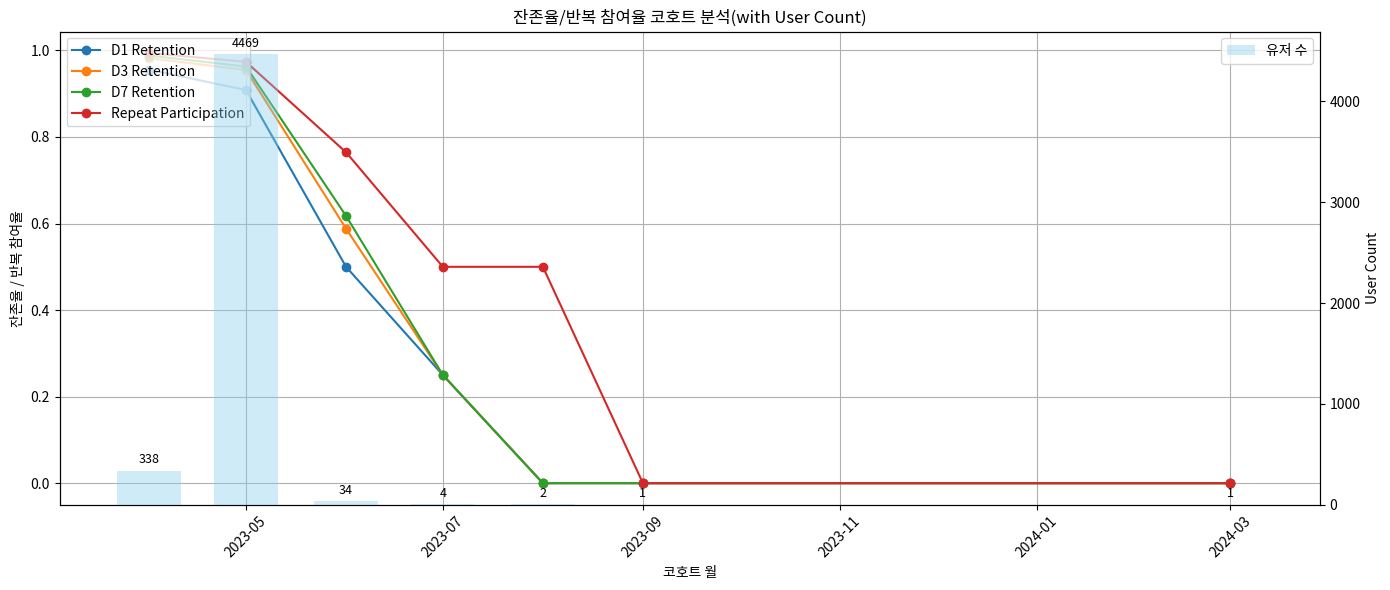

In [ ]:
# Period ‚Üí Timestamp (ÌïÑÏàò Î≥ÄÌôò)
cohort_metrics['cohort_month'] = cohort_metrics['cohort_month'].dt.to_timestamp()

# ÏãúÍ∞ÅÌôî ÏãúÏûë
fig, ax1 = plt.subplots(figsize=(14, 6))

# ÏÑ† Í∑∏ÎûòÌîÑ: Î¶¨ÌÖêÏÖò Î∞è Î∞òÎ≥µ Ï∞∏Ïó¨Ïú®
ax1.plot(cohort_metrics['cohort_month'], cohort_metrics['d1_retention'], marker='o', label='D1 Retention')
ax1.plot(cohort_metrics['cohort_month'], cohort_metrics['d3_retention'], marker='o', label='D3 Retention')
ax1.plot(cohort_metrics['cohort_month'], cohort_metrics['d7_retention'], marker='o', label='D7 Retention')
ax1.plot(cohort_metrics['cohort_month'], cohort_metrics['repeat_rate'], marker='o', label='Repeat Participation')

ax1.set_xlabel('ÏΩîÌò∏Ìä∏ Ïõî')
ax1.set_ylabel('ÏûîÏ°¥Ïú® / Î∞òÎ≥µ Ï∞∏Ïó¨Ïú®')
ax1.set_title('ÏûîÏ°¥Ïú®/Î∞òÎ≥µ Ï∞∏Ïó¨Ïú® ÏΩîÌò∏Ìä∏ Î∂ÑÏÑù(with User Count)')
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Î≥¥Ï°∞Ï∂ï: ÎßâÎåÄ Í∑∏ÎûòÌîÑ (Ïú†Ï†Ä Ïàò)
ax2 = ax1.twinx()
bars = ax2.bar(
    cohort_metrics['cohort_month'],
    cohort_metrics['user_count'],
    width=20,
    color='skyblue',
    alpha=0.4,
    label='Ïú†Ï†Ä Ïàò'
)
ax2.set_ylabel('User Count')
ax2.legend(loc='upper right')

# ÎßâÎåÄ ÏúÑÏóê Ïà´Ïûê ÌëúÏãú
for bar in bars:
    height = bar.get_height()
    ax2.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # ÏïΩÍ∞Ñ ÏúÑÎ°ú ÎùÑÏö∞Í∏∞
        textcoords='offset points',
        ha='center', va='bottom',
        fontsize=9, color='black'
    )

plt.tight_layout()
plt.show()


In [ ]:
## Ïû•Í∏∞ ÌôúÎèô ÏßÄÌëú ÏöîÏïΩ
# 1. datetime Ï≤òÎ¶¨ Î∞è Ï≤´ Î∞©Î¨∏Ïùº Í≥ÑÏÇ∞
user_qr_set['month_since_first'] = (
    user_qr_set['created_at'].dt.to_period('M') - user_qr_set['first_date'].dt.to_period('M')
).apply(lambda x: x.n)

# 2. Ïû•Í∏∞ Ïû¨Î∞©Î¨∏ Ïó¨Î∂Ä (30Ïùº Ïù¥ÌõÑ Ìïú Î≤àÏù¥ÎùºÎèÑ Ï∞∏Ïó¨ÌñàÎäîÏßÄ)
revisit_30plus = user_qr_set.groupby('user_id')['days_since_first'].apply(lambda x: any(x >= 60))
revisit_30plus.name = 'revisited_30plus'

# 3. ÌôúÎèôÌïú Í≥†Ïú† Í∞úÏõî Ïàò
month_active = user_qr_set.groupby('user_id')['month_since_first'].apply(set).reset_index()
month_active['active_months'] = month_active['month_since_first'].apply(len)
month_active = month_active[['user_id', 'active_months']]

# 4. ÏÑ∏Ìä∏ Í∞Ñ ÌèâÍ∑† ÏùëÎãµ Í∞ÑÍ≤©
user_qr_set = user_qr_set.sort_values(['user_id', 'created_at'])
user_qr_set['prev_time'] = user_qr_set.groupby('user_id')['created_at'].shift(1)
user_qr_set['gap_days'] = (user_qr_set['created_at'] - user_qr_set['prev_time']).dt.days
avg_gap_by_user = user_qr_set.groupby('user_id')['gap_days'].mean().reset_index(name='avg_gap_days')

# 5. Í≥†Ïú† Ï∞∏Ïó¨ ÏùºÏàò
active_days = user_qr_set.groupby('user_id')['created_at'].nunique().reset_index(name='active_days')

# 6. ÌÜµÌï© Ï†ïÎ¶¨
summary = pd.DataFrame({'user_id': user_qr_set['user_id'].unique()})
summary = summary.merge(revisit_30plus, on='user_id')
summary = summary.merge(month_active, on='user_id')
summary = summary.merge(avg_gap_by_user, on='user_id')
summary = summary.merge(active_days, on='user_id')

# 7. Ï†ÑÏ≤¥ ÏöîÏïΩ ÌÜµÍ≥Ñ
long_term_revisit_rate = summary['revisited_30plus'].mean()
active_3mo_rate = (summary['active_months'] >= 3).mean()

print("‚úÖ Ïû•Í∏∞ Ïû¨Î∞©Î¨∏Ïú® (30Ïùº Ïù¥ÌõÑ Ïû¨Ï∞∏Ïó¨): {:.2%}".format(long_term_revisit_rate))
print("‚úÖ 3Í∞úÏõî Ïù¥ÏÉÅ ÌôúÎèô Ïú†ÏßÄÏú®: {:.2%}".format(active_3mo_rate))

# summaryÎäî ÏÇ¨Ïö©ÏûêÎ≥Ñ Ïû•Í∏∞ ÌôúÎèô ÏßÄÌëú ÏöîÏïΩ ÌÖåÏù¥Î∏î


‚úÖ Ïû•Í∏∞ Ïû¨Î∞©Î¨∏Ïú® (30Ïùº Ïù¥ÌõÑ Ïû¨Ï∞∏Ïó¨): 11.76%
‚úÖ 3Í∞úÏõî Ïù¥ÏÉÅ ÌôúÎèô Ïú†ÏßÄÏú®: 11.16%


In [ ]:
summary.head()


user_id  revisited_30plus  active_months  avg_gap_days  active_days
0   838023             False              2      0.142857           22
1   838466              True              3      1.030769          131
2   838642             False              1      0.000000           10
3   839357             False              2      0.094787          212
4   840293             False              1      0.047337          170

## Kaplan-Meier, Cox ÌöåÍ∑Ä Î∂ÑÏÑù

In [ ]:
# ÏÉùÏ°¥ Î∂ÑÏÑùÏö© Îç∞Ïù¥ÌÑ∞
# Ïú†Ï†ÄÎ≥Ñ ÏµúÏ¥à, ÏµúÏ¢Ö ÌôúÎèôÏùº Í≥ÑÏÇ∞ 
user_lifespan = user_qr_set.groupby('user_id').agg(
    first_date=('created_at', 'min'),
    last_date=('created_at', 'max')
).reset_index()

# Ïú†Ï†ÄÎ≥Ñ ÌôúÎèô Í∏∞Í∞Ñ Í≥ÑÏÇ∞
user_lifespan['duration_days'] = (user_lifespan['last_date'] - user_lifespan['first_date']).dt.days

# Ïù¥Î≤§Ìä∏(Ïù¥ÌÉà) Î∞úÏÉù Ïó¨Î∂Ä ÏÑ§Ï†ï (Ïù¥ÌÉà Ïó¨Î∂Ä ÌåêÎã® Í∏∞Ï§Ä: Í¥ÄÏ∏° Ï¢ÖÎ£åÏùº Ïù¥Ï†ÑÏóê ÎßàÏßÄÎßâ ÌôúÎèôÌñàÏúºÎ©¥ True)
cutoff_date = user_qr_set['created_at'].max()
user_lifespan['event_observed'] = user_lifespan['last_date'] < cutoff_date

# ÏÉùÏ°¥ Î∂ÑÏÑùÏö© ÌÖåÏù¥Î∏î ÏôÑÏÑ±
survival_df = user_lifespan[['user_id', 'duration_days', 'event_observed']]

survival_df.head()

user_id  duration_days  event_observed
0   838023              4            True
1   838466            138            True
2   838642              0            True
3   839357             26            True
4   840293             12            True

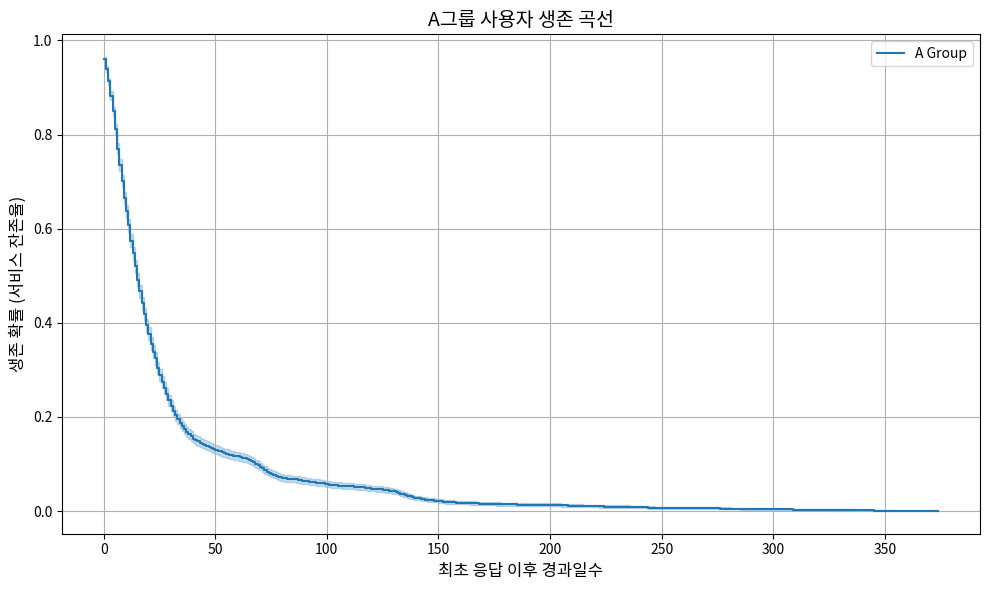

In [ ]:
from lifelines import KaplanMeierFitter

T = survival_df['duration_days']
E = survival_df['event_observed']

kmf = KaplanMeierFitter()
kmf.fit(durations=T, event_observed=E, label='A Group')

plt.figure(figsize=(10, 6))
kmf.plot(ci_show=True)
plt.title('AÍ∑∏Î£π ÏÇ¨Ïö©Ïûê ÏÉùÏ°¥ Í≥°ÏÑ†', fontsize=14)
plt.xlabel('ÏµúÏ¥à ÏùëÎãµ Ïù¥ÌõÑ Í≤ΩÍ≥ºÏùºÏàò', fontsize=12)
plt.ylabel('ÏÉùÏ°¥ ÌôïÎ•† (ÏÑúÎπÑÏä§ ÏûîÏ°¥Ïú®)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### ÏùëÎãµÌïú ÏßàÎ¨∏ ÏàòÍ∞Ä Ï†ÅÏùÑ ÏàòÎ°ù ÏÉùÏ°¥ Í∏∞Í∞ÑÏù¥ ÏßßÏùÄÏßÄ

In [ ]:
user_qr_cnt

set_id  user_id  question_cnt
0          99817   849436            10
1        3954737  1101088            10
2       12094100  1170559            10
3        3960625  1158106            10
4        3960857  1113966            10
...          ...      ...           ...
152220  17326660  1171866             1
152221  17324017   935887             1
152222  17322185   881242             1
152223  14745134  1381784             1
152224   1195473   856828             1

[152225 rows x 3 columns]

In [ ]:
user_lifespan

user_id          first_date           last_date  duration_days  \
0      838023 2023-04-29 16:22:56 2023-05-04 07:26:25              4   
1      838466 2023-05-02 22:42:05 2023-09-18 12:48:28            138   
2      838642 2023-04-28 14:18:07 2023-04-29 03:00:56              0   
3      839357 2023-04-29 16:51:01 2023-05-26 07:18:10             26   
4      840293 2023-05-03 02:24:05 2023-05-15 09:35:08             12   
...       ...                 ...                 ...            ...   
4844  1577440 2023-06-29 09:03:48 2023-09-18 15:23:58             81   
4845  1578095 2023-07-11 13:29:13 2023-12-08 14:35:49            150   
4846  1579418 2023-07-25 13:48:30 2023-08-05 13:19:15             10   
4847  1580578 2023-09-20 15:31:20 2023-09-20 15:31:38              0   
4848  1583358 2024-03-19 12:56:39 2024-03-19 12:57:17              0   

      event_observed  
0               True  
1               True  
2               True  
3               True  
4               True  
...              ...  
4844            True  
4845            True  
4846            True  
4847            True  
4848            True  

[4849 rows x 5 columns]

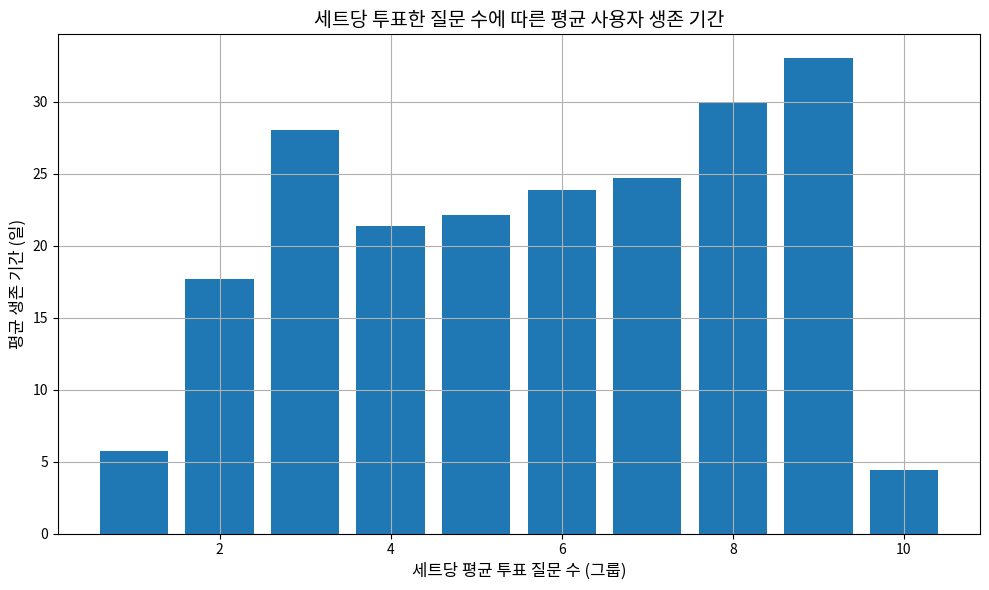

In [ ]:
# 1. user_qr_cntÏóêÏÑú ÏÇ¨Ïö©ÏûêÎ≥Ñ ÌèâÍ∑† question_cnt Í≥ÑÏÇ∞
user_mean_qcnt = user_qr_cnt.groupby('user_id')['question_cnt'].mean().reset_index(name='mean_question_cnt')

# 2. user_lifespanÍ≥º Î≥ëÌï©
summary_df = pd.merge(user_lifespan[['user_id', 'duration_days']], user_mean_qcnt, on='user_id', how='inner')

# 3. question_cntÎ•º Ï†ïÏàòÎ°ú ÎÇ¥Î¶º (Í∑∏Î£πÌôîÏö©)
summary_df['qcnt_group'] = summary_df['mean_question_cnt'].astype(int)

# 4. Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† ÏÉùÏ°¥ Í∏∞Í∞Ñ Í≥ÑÏÇ∞
grouped = summary_df.groupby('qcnt_group')['duration_days'].mean().reset_index()

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.bar(grouped['qcnt_group'], grouped['duration_days'])
plt.xlabel('ÏÑ∏Ìä∏Îãπ ÌèâÍ∑† Ìà¨Ìëú ÏßàÎ¨∏ Ïàò (Í∑∏Î£π)', fontsize=12)
plt.ylabel('ÌèâÍ∑† ÏÉùÏ°¥ Í∏∞Í∞Ñ (Ïùº)', fontsize=12)
plt.title('ÏÑ∏Ìä∏Îãπ Ìà¨ÌëúÌïú ÏßàÎ¨∏ ÏàòÏóê Îî∞Î•∏ ÌèâÍ∑† ÏÇ¨Ïö©Ïûê ÏÉùÏ°¥ Í∏∞Í∞Ñ', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


- Í∑ºÎç∞ Ïù¥Í±¥ Ïú†Ï†Ä Íµ¨Î∂ÑÏù¥ ÏïàÎêòÏóàÎã§. 

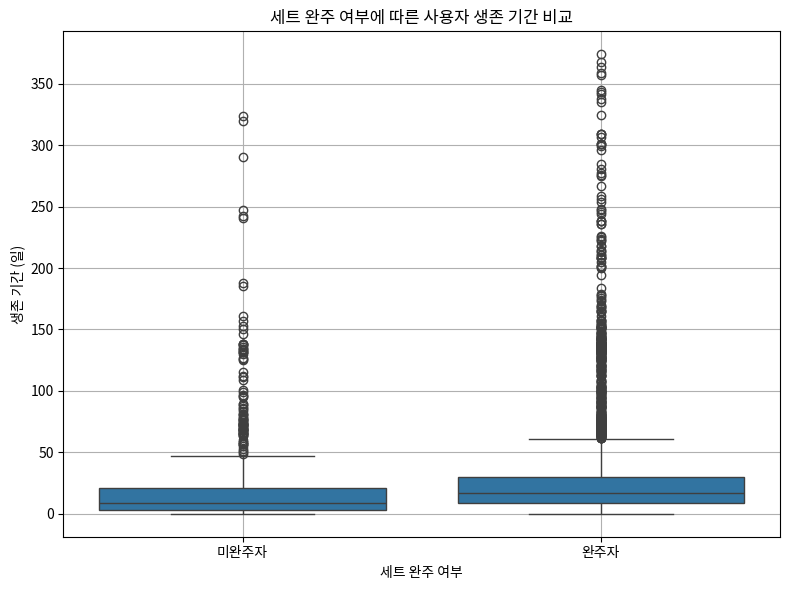

  complete  mean_duration
0     ÎØ∏ÏôÑÏ£ºÏûê      18.832703
1      ÏôÑÏ£ºÏûê      30.321023


In [ ]:
## ÏÑ∏Ìä∏ ÏôÑÏ£º Ïó¨Î∂ÄÏôÄ ÏÉùÏ°¥ Í∏∞Í∞Ñ ÎπÑÍµê
#  1. ÏôÑÏ£º Ïó¨Î∂Ä Í≥ÑÏÇ∞: question_cnt == 10Ïù∏ Ïú†Ï†ÄÎ•º ÏôÑÏ£ºÏûêÎ°ú Ï†ïÏùò
complete_users = user_qr_cnt[user_qr_cnt['question_cnt'] == 10]['user_id'].unique()
user_lifespan['complete'] = user_lifespan['user_id'].isin(complete_users)

# 2. Î∞ïÏä§ÌîåÎ°Ø ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 6))
sns.boxplot(data=user_lifespan, x='complete', y='duration_days')
plt.xticks([0, 1], ['ÎØ∏ÏôÑÏ£ºÏûê', 'ÏôÑÏ£ºÏûê'])
plt.xlabel('ÏÑ∏Ìä∏ ÏôÑÏ£º Ïó¨Î∂Ä')
plt.ylabel('ÏÉùÏ°¥ Í∏∞Í∞Ñ (Ïùº)')
plt.title('ÏÑ∏Ìä∏ ÏôÑÏ£º Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÏÇ¨Ïö©Ïûê ÏÉùÏ°¥ Í∏∞Í∞Ñ ÎπÑÍµê')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† ÏÉùÏ°¥ Í∏∞Í∞Ñ Ï∂úÎ†•Ïö© ÌÖåÏù¥Î∏î
group_avg = user_lifespan.groupby('complete')['duration_days'].mean().reset_index()
group_avg.columns = ['complete', 'mean_duration']
group_avg['complete'] = group_avg['complete'].map({True: 'ÏôÑÏ£ºÏûê', False: 'ÎØ∏ÏôÑÏ£ºÏûê'})
print(group_avg)

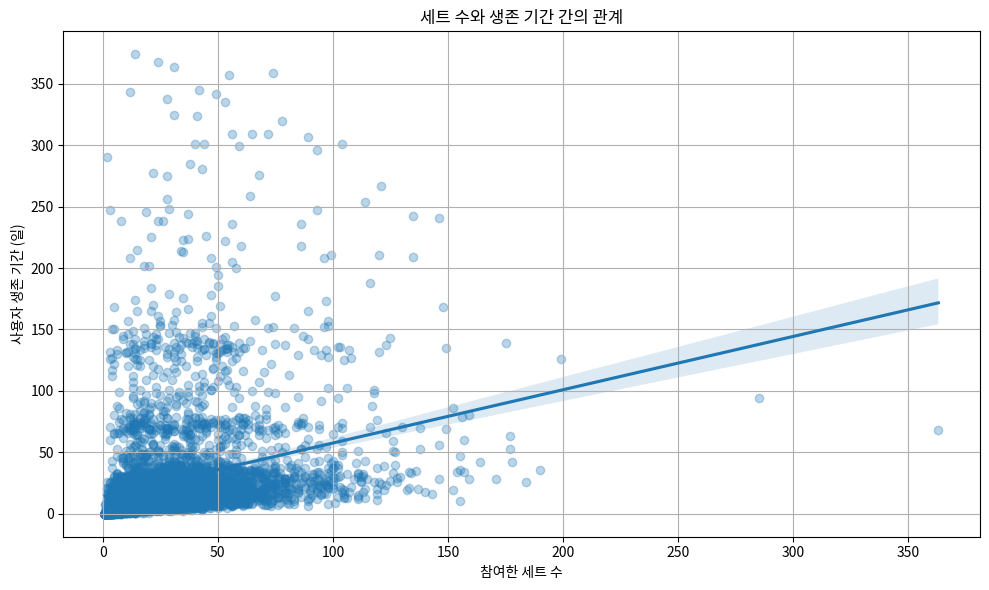

üìà ÏÑ∏Ìä∏ ÏàòÏôÄ ÏÉùÏ°¥ Í∏∞Í∞Ñ Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.280


In [ ]:
## ÏÑ∏Ìä∏ ÏàòÏôÄ ÏÉùÏ°¥ Í∏∞Í∞Ñ Í∞ÑÏùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù
# 1. user_qr_cntÏóêÏÑú ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÑ∏Ìä∏ Ïàò Í≥ÑÏÇ∞  
# 1. ÏÇ¨Ïö©ÏûêÎ≥Ñ ÏÑ∏Ìä∏ Ïàò Í≥ÑÏÇ∞
user_set_count = user_qr_cnt.groupby('user_id')['set_id'].nunique().reset_index(name='set_count')

# 2. user_lifespanÍ≥º Î≥ëÌï©
user_set_lifespan = pd.merge(user_lifespan[['user_id', 'duration_days']], user_set_count, on='user_id')

# 3. ÏãúÍ∞ÅÌôî (ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ†)
plt.figure(figsize=(10, 6))
sns.regplot(data=user_set_lifespan, x='set_count', y='duration_days', scatter_kws={'alpha': 0.3})
plt.xlabel('Ï∞∏Ïó¨Ìïú ÏÑ∏Ìä∏ Ïàò')
plt.ylabel('ÏÇ¨Ïö©Ïûê ÏÉùÏ°¥ Í∏∞Í∞Ñ (Ïùº)')
plt.title('ÏÑ∏Ìä∏ ÏàòÏôÄ ÏÉùÏ°¥ Í∏∞Í∞Ñ Í∞ÑÏùò Í¥ÄÍ≥Ñ')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation = user_set_lifespan['set_count'].corr(user_set_lifespan['duration_days'])
print(f"üìà ÏÑ∏Ìä∏ ÏàòÏôÄ ÏÉùÏ°¥ Í∏∞Í∞Ñ Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}")

In [ ]:
# ÏôÑÏ£ºÏó¨Î∂ÄÏóê Îî∞Î•∏ Ïù¥ÌÉàÏú®

# 1. ÏôÑÏ£º Ïó¨Î∂Ä Í≥ÑÏÇ∞ (1Í∞ú Ïù¥ÏÉÅ question_cnt == 10 ÏÑ∏Ìä∏Î•º Í∞ÄÏßÑ Ïú†Ï†Ä ‚Üí ÏôÑÏ£ºÏûê)
complete_users = user_qr_cnt[user_qr_cnt['question_cnt'] == 10]['user_id'].unique()
user_lifespan['complete'] = user_lifespan['user_id'].isin(complete_users)

# 2. Ïù¥ÌÉà Ïó¨Î∂ÄÎäî user_lifespan['event_observed']ÏóêÏÑú Ïù¥ÎØ∏ Ï°¥Ïû¨ (True = Ïù¥ÌÉàÌï®)
# Ïù¥ÌÉàÎ•† Í≥ÑÏÇ∞ (event_observed == TrueÏù∏ ÎπÑÏú®)

# 3. Í∑∏Î£πÎ≥Ñ Ïù¥ÌÉàÎ•† Í≥ÑÏÇ∞
churn_rate = user_lifespan.groupby('complete')['event_observed'].mean().reset_index()
churn_rate.columns = ['complete', 'churn_rate']
churn_rate['complete'] = churn_rate['complete'].map({True: 'ÏôÑÏ£ºÏûê', False: 'ÎØ∏ÏôÑÏ£ºÏûê'})

# Ï∂úÎ†•
print(churn_rate)


  complete  churn_rate
0     ÎØ∏ÏôÑÏ£ºÏûê    1.000000
1      ÏôÑÏ£ºÏûê    0.999736


### polls_question Í∏∞Ï¥à EDA ÏãúÍ∞ÅÌôî 

In [ ]:
question = pd.read_csv('./data/polls_question.csv', encoding='utf-8')
question.head()

id                 question_text           created_at
0   99            Í∞ÄÏû• Ïã†ÎπÑÌïú Îß§Î†•Ïù¥ ÏûàÎäî ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:22:53
1  100  "Ïù¥ ÏÇ¨ÎûåÏúºÎ°ú Ìïú Î≤à ÏÇ¥ÏïÑÎ≥¥Í≥† Ïã∂Îã§" ÌïòÎäî ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:22:53
2  101                     ÎØ∏ÎûòÏùò Ìã±ÌÜ°Ïª§Îäî?  2023-03-31 15:22:54
3  102               Ïó¨Í∏∞ÏÑú Ï†úÏùº ÌäπÏù¥Ìïú ÏπúÍµ¨Îäî?  2023-03-31 15:22:54
4  103               Í∞ÄÏû• ÏßÄÏºúÏ£ºÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏùÄ?  2023-03-31 15:22:55

In [ ]:
question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5025 non-null   int64 
 1   question_text  5025 non-null   object
 2   created_at     5025 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.9+ KB


In [ ]:
# created_at Ïª¨Îüº datetimeÏúºÎ°ú Î≥ÄÌôòÌïòÍ∏∞
question['created_at'] = pd.to_datetime(question['created_at'])

In [ ]:
# created_atÏóêÏÑú ÎÇ†ÏßúÎßå Ï∂îÏ∂úÌïòÍ∏∞ 
question['date'] = question['created_at'].dt.date

# ÎÇ†ÏßúÎ≥Ñ ÏßàÎ¨∏ Ïàò ÏßëÍ≥ÑÌïòÍ∏∞ 
daily_question_cnt = question.groupby('date')['id'].count().reset_index(name='question_cnt')

daily_question_cnt

date  question_cnt
0  2023-03-31            73
1  2023-04-01           154
2  2023-05-02           235
3  2023-05-04             1
4  2023-05-11            91
5  2023-05-15           982
6  2023-06-02          1523
7  2023-06-06          1966

In [ ]:
question['date'].nunique()

8

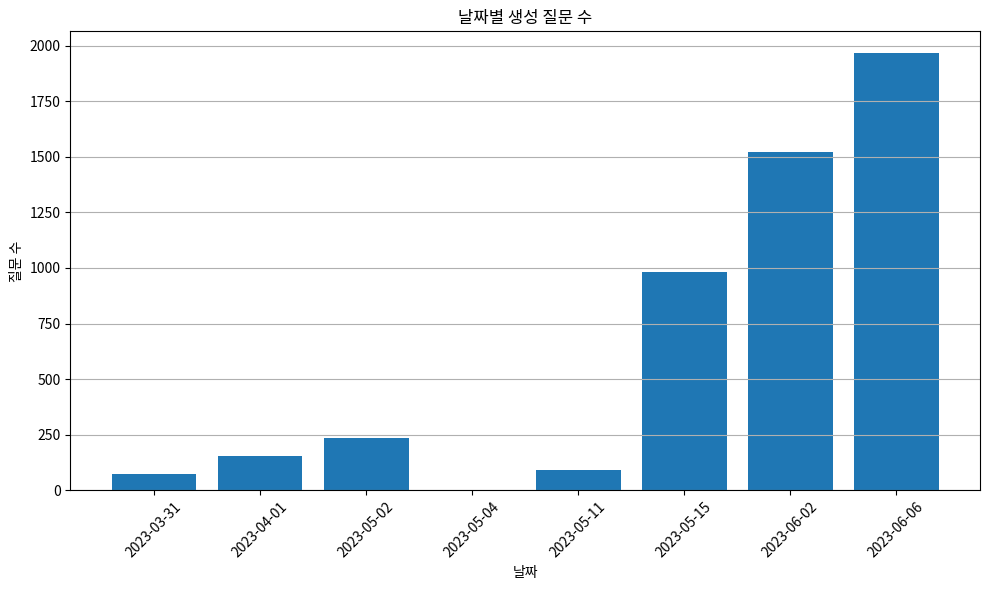

In [ ]:
# ÎÇ†ÏßúÎ≥Ñ ÏßàÎ¨∏ Ïàò ÏßëÍ≥Ñ ÏãúÍ∞ÅÌôîÌïòÍ∏∞
plt.figure(figsize=(10, 6))
plt.bar(daily_question_cnt['date'].astype(str), daily_question_cnt['question_cnt'])  # xÏ∂ïÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïòÏó¨ Î≥¥Í∏∞ Ï¢ãÍ≤å ÌëúÏãú
plt.title("ÎÇ†ÏßúÎ≥Ñ ÏÉùÏÑ± ÏßàÎ¨∏ Ïàò")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("ÏßàÎ¨∏ Ïàò")
plt.xticks(rotation=45)  # ÎÇ†ÏßúÍ∞Ä Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÌöåÏ†Ñ
plt.tight_layout()
plt.grid(axis='y')
plt.show()